# Importación de librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, minmax_scale

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.cluster import MeanShift, estimate_bandwidth

from itertools import cycle
from sklearn.mixture import GaussianMixture

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

import statsmodels.api as sm

import statsmodels.formula.api as smf

from pandas_profiling import ProfileReport

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 

# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier

# Para usar Random Tree Forest como clasificador
from sklearn.ensemble import RandomForestClassifier

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
# from sklearn.metrics import plot_confusion_matrix

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para la validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#Librerías para la visualización
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

#SMF
import statsmodels.formula.api as smf

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# check version number
import imblearn

from collections import Counter

from sklearn import linear_model

# Lectura de datos

In [2]:
archivo= pd.read_excel("Info_premier_compl_2022-2023.xlsx",sheet_name=None)
espana_datos= pd.read_excel("Info_laliga_compl_2022-2023.xlsx",sheet_name=None)

In [3]:
for i in archivo:
    archivo[i] = pd.concat([archivo[i],espana_datos[i]])
    print(i)

match_stats
stats_keeper
stats_summary
stats_shots
stats_passing
stats_passing_types
stats_defense
stats_possession
stats_misc


In [4]:
data_valor_jugadores= pd.read_excel("data_valor_jugadores.xlsx",sheet_name="Valo Jugadores")
data_valor_jugadores_espa= pd.read_excel("data_valor_jugadores_espana.xlsx",sheet_name="Valo Jugadores")

In [5]:
data_valor_jugadores =pd.concat([data_valor_jugadores,data_valor_jugadores_espa])

In [6]:
data_valor_jugadores

,Jugador,Nacionalidad,Edad,Club,Histórico valor mercado máximo,Ultima actualización,Valor actual mercado
0,Ederson,Brazil,29,Manchester City,€70.00m,"Nov 3, 2022",€45.00m
1,Alisson,Brazil,30,Liverpool FC,€90.00m,"Mar 16, 2023",€45.00m
2,Aaron Ramsdale,England,25,Arsenal FC,€38.00m,"Mar 16, 2023",€38.00m
3,Robert Sánchez,Spain,25,Brighton & Hove Albion,€32.00m,"Nov 3, 2022",€32.00m
4,Emiliano Martínez,Argentina,30,Aston Villa,€35.00m,"Dec 23, 2022",€28.00m
...,...,...,...,...,...,...,...
491,Juanmi Latasa,Spain,22,Getafe CF,€1.00m,"Nov 7, 2022",€1.00m
492,Miguel Rodríguez,Spain,20,Celta de Vigo,€1.00m,"Dec 29, 2022",€1.00m
493,Ángel Rodríguez,Spain,36,RCD Mallorca,€7.50m,"Nov 7, 2022",€1.00m
494,Andrés Martín,Spain,23,Rayo Vallecano,€2.50m,"Nov 7, 2022",€1.00m


In [7]:
archivo['match_stats']

,Unnamed: 0,Fecha,HomeTeam,AwayTeam,HF,AF,HC,AC,HPCru,APCru,...,HOFF,AOFF,HGK,AGK,HSB,ASB,HPelotazos,APelotazos,HxG,AxG
0,0,"Miércoles Febrero 15, 2023",Arsenal,Manchester City,11,15,1,2,17,9,...,0,3,3,10,21,18,62,65,"1,6","1,8"
1,1,"Sábado Febrero 18, 2023",Aston Villa,Arsenal,13,4,2,9,9,30,...,0,2,11,2,12,36,57,49,"0,5","3,2"
2,2,"Sábado Febrero 18, 2023",Brighton,Fulham,12,14,10,2,21,6,...,4,0,3,12,13,9,52,61,"2,2","0,3"
3,3,"Sábado Febrero 18, 2023",Nott'ham Forest,Manchester City,8,6,0,10,4,34,...,2,0,15,4,9,27,68,81,"0,9","2,4"
4,4,"Sábado Febrero 18, 2023",Chelsea,Southampton,16,25,8,2,20,8,...,3,1,6,9,30,16,56,73,"1,6","0,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,5,"Sábado Mayo 20, 2023",Barcelona,Real Sociedad,8,16,8,2,17,9,...,2,2,5,4,25,15,57,54,"1,5","2,0"
346,6,"Domingo Mayo 21, 2023",Rayo Vallecano,Espanyol,8,11,4,4,32,19,...,2,1,7,8,36,21,88,75,"2,0","1,6"
347,7,"Domingo Mayo 21, 2023",Atlético Madrid,Osasuna,6,11,8,10,15,34,...,5,1,13,7,16,16,65,77,"1,9","0,8"
348,8,"Domingo Mayo 21, 2023",Valencia,Real Madrid,13,4,2,9,15,23,...,2,2,11,5,11,18,51,51,"1,0","1,4"


In [8]:
archivo['stats_keeper']

,Unnamed: 0,Fecha,Equipo,Jugador,País,Edad,Mín,DaPC,GC,Salvadas,...,%deLanzamientos,Long. prom.,Int..2,%deLanzamientos.1,Long. prom..1,Opp,Stp,% de Stp,Núm. de OPA,DistProm.
0,0,"Miércoles Febrero 15, 2023",Arsenal,Aaron Ramsdale,eng ENG,24-277,90,5.0,3.0,2.0,...,27.0,28.9,3.0,100.0,68.3,7,0.0,0.0,0.0,2.0
1,1,"Miércoles Febrero 15, 2023",Manchester City,Ederson,br BRA,29-182,90,1.0,1.0,0.0,...,51.9,42.4,10.0,90.0,64.6,11,0.0,0.0,0.0,19.0
2,2,"Sábado Febrero 18, 2023",Aston Villa,Emiliano Martínez,ar ARG,30-169,90,5.0,4.0,2.0,...,75.0,47.4,11.0,81.8,54.8,17,3.0,17.6,0.0,7.3
3,3,"Sábado Febrero 18, 2023",Arsenal,Aaron Ramsdale,eng ENG,24-280,90,5.0,2.0,3.0,...,23.8,25.0,2.0,0.0,16.0,6,0.0,0.0,1.0,44.0
4,4,"Sábado Febrero 18, 2023",Brighton,Robert Sánchez,es ESP,25-092,90,2.0,1.0,1.0,...,4.2,16.9,3.0,0.0,14.0,5,1.0,20.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,15,"Domingo Mayo 21, 2023",Osasuna,Sergio Herrera,es ESP,29-350,90,5.0,3.0,2.0,...,31.3,31.0,7.0,14.3,26.9,13,1.0,7.7,0.0,4.0
704,16,"Domingo Mayo 21, 2023",Valencia,Giorgi Mamardashvili,ge GEO,22-234,90,5.0,0.0,5.0,...,75.0,47.7,11.0,100.0,67.9,21,2.0,9.5,0.0,4.7
705,17,"Domingo Mayo 21, 2023",Real Madrid,Thibaut Courtois,be BEL,31-010,90,6.0,1.0,5.0,...,17.9,26.0,5.0,0.0,14.6,11,1.0,9.1,2.0,16.3
706,18,"Domingo Mayo 21, 2023",Sevilla,Marko Dmitrović,rs SRB,31-117,90,0.0,0.0,0.0,...,65.2,46.0,10.0,90.0,64.9,9,0.0,0.0,1.0,27.0


In [9]:
match_stats = archivo['match_stats']
match_stats

,Unnamed: 0,Fecha,HomeTeam,AwayTeam,HF,AF,HC,AC,HPCru,APCru,...,HOFF,AOFF,HGK,AGK,HSB,ASB,HPelotazos,APelotazos,HxG,AxG
0,0,"Miércoles Febrero 15, 2023",Arsenal,Manchester City,11,15,1,2,17,9,...,0,3,3,10,21,18,62,65,"1,6","1,8"
1,1,"Sábado Febrero 18, 2023",Aston Villa,Arsenal,13,4,2,9,9,30,...,0,2,11,2,12,36,57,49,"0,5","3,2"
2,2,"Sábado Febrero 18, 2023",Brighton,Fulham,12,14,10,2,21,6,...,4,0,3,12,13,9,52,61,"2,2","0,3"
3,3,"Sábado Febrero 18, 2023",Nott'ham Forest,Manchester City,8,6,0,10,4,34,...,2,0,15,4,9,27,68,81,"0,9","2,4"
4,4,"Sábado Febrero 18, 2023",Chelsea,Southampton,16,25,8,2,20,8,...,3,1,6,9,30,16,56,73,"1,6","0,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,5,"Sábado Mayo 20, 2023",Barcelona,Real Sociedad,8,16,8,2,17,9,...,2,2,5,4,25,15,57,54,"1,5","2,0"
346,6,"Domingo Mayo 21, 2023",Rayo Vallecano,Espanyol,8,11,4,4,32,19,...,2,1,7,8,36,21,88,75,"2,0","1,6"
347,7,"Domingo Mayo 21, 2023",Atlético Madrid,Osasuna,6,11,8,10,15,34,...,5,1,13,7,16,16,65,77,"1,9","0,8"
348,8,"Domingo Mayo 21, 2023",Valencia,Real Madrid,13,4,2,9,15,23,...,2,2,11,5,11,18,51,51,"1,0","1,4"


In [10]:
def devolver_dia_semana(dia_semana):

    if dia_semana == "Lunes":
        return 1
    elif dia_semana == "Martes":
        return 2
    elif dia_semana == "Miércoles":
        return 3
    elif dia_semana == "Jueves":
        return 4
    elif dia_semana == "Viernes":
        return 5
    elif dia_semana == "Sábado":
        return 6
    elif dia_semana == "Domingo":
        return 7
    return

def devolver_mes_anio(mes):
    if mes == "Enero":
        return 1
    elif mes == "Febrero":
        return 2
    elif mes == "Marzo":
        return 3
    elif mes == "Abril":
        return 4
    elif mes == "Mayo":
        return 5
    elif mes == "Junio":
        return 6
    elif mes == "Julio":
        return 7
    elif mes == "Agosto":
        return 8
    elif mes == "Septiembre":
        return 9
    elif mes == "Octubre":
        return 10
    elif mes == "Noviembre":
        return 11
    elif mes == "Diciembre":
        return 12
    return


def parse_fecha_espanol(fecha):


    # Borar coma
    datos = fecha.replace(",", "").split()
   
    # Mes
    mes = devolver_mes_anio(datos[1])
    # Número del dia en el año
    num_dia = int(datos[2])
    # Año
    anio = int(datos[3])

    fecha_dt = datetime.datetime(anio, mes, num_dia).date()

    return fecha_dt


def parse_dia_semana(fecha):

    # Borar coma
    datos = fecha.replace(",", "").split()

    # Obtener el día de la semana en número
    dia_semana = devolver_dia_semana(datos[0])

    return int(dia_semana)

In [11]:
fecha = match_stats['Fecha'].apply(parse_fecha_espanol)
dia_semana = match_stats['Fecha'].apply(parse_dia_semana)

In [12]:
match_stats['Fecha'] = fecha
match_stats['dia_semana'] = dia_semana

In [13]:
def quitar_espacios(entrada):
    return entrada.strip()

In [14]:
stats_summary =archivo['stats_summary'].copy()
stats_summary['Jugador'] = stats_summary['Jugador'].apply(quitar_espacios)
(stats_summary[['Jugador','xG']].groupby(["Jugador"]).mean()).sort_values(by="xG",ascending=False)

,xG
Jugador,
Karim Benzema,0.909091
Erling Haaland,0.827273
Robert Lewandowski,0.751613
Aleksandar Mitrović,0.591304
Callum Wilson,0.579310
...,...
Juan Larios,0.000000
José Sá,0.000000
José Pozo,0.000000


In [15]:
stats_summary =archivo['stats_summary'].copy()
stats_summary['Jugador'] = stats_summary['Jugador'].apply(quitar_espacios)
(stats_summary[['Jugador','xG']].groupby(["Jugador"]).sum()).sort_values(by="xG",ascending=False)

,xG
Jugador,
Erling Haaland,27.3
Robert Lewandowski,23.3
Mohamed Salah,20.7
Harry Kane,20.6
Karim Benzema,20.0
...,...
Saman Ghoddos,0.0
Jon Pacheco,0.0
Jon Magunacelaya,0.0


In [16]:
stats_summary[['Jugador','npxG']].groupby(["Jugador"]).mean().sort_values(by="npxG",ascending=False)

,npxG
Jugador,
Robert Lewandowski,0.725806
Erling Haaland,0.663636
Karim Benzema,0.645455
Gabriel Jesus,0.516000
Callum Wilson,0.496552
...,...
Juan Larios,0.000000
José Sá,0.000000
José Pozo,0.000000


In [17]:
stats_summary[['Jugador','xAG']].groupby(["Jugador"]).mean().sort_values(by="xAG",ascending=False)

,xAG
Jugador,
Kevin De Bruyne,0.453333
Bruno Fernandes,0.451429
Antoine Griezmann,0.351429
Kieran Trippier,0.333333
James Maddison,0.321429
...,...
Joseph Whitworth,0.000000
Joseph Aidoo,0.000000
Joseba Zaldúa,0.000000


In [18]:
stats_summary[['Jugador','Int']].groupby(["Jugador"]).mean().sort_values(by="Int",ascending=False)

,Int
Jugador,
Jan Bednarek,2.285714
Unai Núñez,2.090909
Federico Fernández,2.000000
Wesley Fofana,2.000000
Manuel Pozo,2.000000
...,...
Mislav Oršić,0.000000
Carlos Dominguez,0.000000
Memphis,0.000000


In [19]:
stats_summary

,Unnamed: 0,Fecha,Equipo,Jugador,núm.,País,Posc,Edad,Mín,Gls.,...,ACT,ACG,Cmp,Int.,% Cmp,PrgP,Transportes,PrgC,Att,Succ
0,0,"Miércoles Febrero 15, 2023",Arsenal,Eddie Nketiah,14,eng ENG,FW,23-261,90,0,...,2.0,1.0,11.0,13.0,84.6,1.0,14.0,1.0,1.0,0.0
1,1,"Miércoles Febrero 15, 2023",Arsenal,Martinelli,11,br BRA,LW,21-242,75,0,...,5.0,0.0,18.0,23.0,78.3,2.0,18.0,3.0,4.0,3.0
2,2,"Miércoles Febrero 15, 2023",Arsenal,Leandro Trossard,19,be BEL,LW,28-073,15,0,...,1.0,0.0,10.0,14.0,71.4,2.0,15.0,1.0,0.0,0.0
3,3,"Miércoles Febrero 15, 2023",Arsenal,Bukayo Saka,7,eng ENG,RW,21-163,90,1,...,1.0,0.0,19.0,27.0,70.4,3.0,22.0,2.0,4.0,1.0
4,4,"Miércoles Febrero 15, 2023",Arsenal,Granit Xhaka,34,ch SUI,LM,30-141,82,0,...,1.0,1.0,31.0,41.0,75.6,4.0,29.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,313,"Domingo Mayo 21, 2023",Betis,Juan Miranda,33,es ESP,LB,23-122,7,0,...,0.0,0.0,2.0,5.0,40.0,0.0,1.0,0.0,0.0,0.0
10901,314,"Domingo Mayo 21, 2023",Betis,Luiz Felipe,19,it ITA,CB,26-060,90,0,...,1.0,0.0,26.0,34.0,76.5,2.0,20.0,0.0,1.0,0.0
10902,315,"Domingo Mayo 21, 2023",Betis,Germán Pezzella,16,ar ARG,CB,31-328,90,0,...,0.0,0.0,22.0,31.0,71.0,0.0,20.0,0.0,1.0,0.0
10903,316,"Domingo Mayo 21, 2023",Betis,Youssouf Sabaly,23,sn SEN,RB,30-077,90,0,...,3.0,0.0,27.0,35.0,77.1,5.0,21.0,1.0,1.0,0.0


In [20]:
stats_keeper =archivo['stats_keeper'].copy()
stats_keeper['Jugador'] = stats_keeper['Jugador'].apply(quitar_espacios)
(stats_keeper[['Jugador','PSxG']].groupby(["Jugador"]).mean()).sort_values(by="PSxG",ascending=True)

,PSxG
Jugador,
Álvaro Aceves,0.100000
Leandro Cabrera,0.500000
Stefan Ortega,0.500000
Asmir Begović,0.500000
Marc-André ter Stegen,0.608571
...,...
Joel Robles,1.750000
Daniel Iversen,1.810000
Daniel Bentley,1.950000


# Modelo Predicción precio Jugadores

In [21]:
stats_summary =archivo['stats_summary'].copy()
stats_summary['Jugador'] = stats_summary['Jugador'].apply(quitar_espacios)
fecha = stats_summary['Fecha'].apply(parse_fecha_espanol)
stats_summary['Fecha'] = fecha
jugadores_por_partido= stats_summary[['Fecha','Jugador']].groupby(['Fecha',"Jugador"]).sum().reset_index()

In [22]:
jugadores_por_partido

,Fecha,Jugador
0,2022-08-05,Aaron Ramsdale
1,2022-08-05,Albert Sambi Lokonga
2,2022-08-05,Ben White
3,2022-08-05,Bukayo Saka
4,2022-08-05,Cheick Doucouré
...,...,...
21747,2023-05-21,Éder Militão
21748,2023-05-21,Érik Lamela
21749,2023-05-21,Óliver Torres
21750,2023-05-21,Óscar Gil


In [23]:
archivo['stats_keeper'].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'País', 'Edad', 'Mín',
       'DaPC', 'GC', 'Salvadas', '% Salvadas', 'PSxG', 'Cmp', 'Int.', '% Cmp',
       'Int..1', 'TI', '%deLanzamientos', 'Long. prom.', 'Int..2',
       '%deLanzamientos.1', 'Long. prom..1', 'Opp', 'Stp', '% de Stp',
       'Núm. de OPA', 'DistProm.'],
      dtype='object')

In [24]:
archivo['stats_passing'].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'núm.', 'País', 'Posc',
       'Edad', 'Mín', 'Cmp', 'Int.', '% Cmp', 'Dist. tot.', 'Dist. prg.',
       'Cmp.1', 'Int..1', '% Cmp.1', 'Cmp.2', 'Int..2', '% Cmp.2', 'Cmp.3',
       'Int..3', '% Cmp.3', 'Ass', 'xAG', 'xA', 'PC', '1/3', 'PPA', 'CrAP',
       'PrgP'],
      dtype='object')

In [25]:
archivo['stats_passing_types'].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'núm.', 'País', 'Posc',
       'Edad', 'Mín', 'Int.', 'Balón vivo', 'Balón muerto', 'FK', 'PL',
       'Camb.', 'Pcz', 'Lanz.', 'SE', 'Dentro', 'Fuera', 'Rect.', 'Cmp', 'PA',
       'Bloqueos'],
      dtype='object')

In [26]:
archivo['stats_defense'].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'núm.', 'País', 'Posc',
       'Edad', 'Mín', 'Tkl', 'TklG', '3.º def.', '3.º cent.', '3.º ataq.',
       'Tkl.1', 'Att', 'Tkl%', 'Pérdida', 'Bloqueos', 'Dis', 'Pases', 'Int',
       'Tkl+Int', 'Desp.', 'Err'],
      dtype='object')

In [27]:
archivo['stats_possession'].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'núm.', 'País', 'Posc',
       'Edad', 'Mín', 'Toques', 'Def. pen.', '3.º def.', '3.º cent.',
       '3.º ataq.', 'Ataq. pen.', 'Balón vivo', 'Att', 'Succ', 'Exitosa%',
       'Tkld', 'Tkld%', 'Transportes', 'Dist. tot.', 'Dist. prg.', 'PrgC',
       '1/3', 'TAP', 'Errores de control', 'Des', 'Rec', 'PrgR'],
      dtype='object')

In [28]:
archivo['stats_misc'].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'núm.', 'País', 'Posc',
       'Edad', 'Mín', 'TA', 'TR', '2a amarilla', 'Fls', 'FR', 'PA', 'Pcz',
       'Int', 'TklG', 'Penal ejecutado', 'Penal concedido', 'GC', 'Recup.',
       'Ganados', 'Perdidos', '% de ganados'],
      dtype='object')

In [29]:
nombres_hoja_partidos=["stats_summary","stats_keeper","stats_passing","stats_passing_types","stats_defense","stats_possession","stats_misc"]
for hoja in nombres_hoja_partidos:
    if hoja== "stats_summary":
        archivo[hoja] = archivo[hoja].rename({"Gls.": "Goles Anotados S","Ass":"Asistencias S","TP":"Tiros Penales Ejecutado Ss"
                                        ,"TPint":"Tiros Penales Intentados S","Dis":"Total disparos S","DaP":"Disparos a puerta S",
                                       "TA":"Tarjetas Amarillas S","TR":"Tarjetas Rojas S","Tkl":"Barridas S","Int":"Intercepciones S",
                                       "Cmp":"Pases Completados S","Int.":"Pases Intentados S","% Cmp":"% de pase completo","PrgP":"Pases Progresivos S",
                                        "PrgC":"Acarreos progresivos S","Att":"Regates intentados S","Succ":"Regates exitosos S","Bloqueos":"Bloqueos S","Toques":"Toques S"},axis="columns")
    elif hoja== "stats_keeper":
        archivo[hoja] = archivo[hoja].rename({"DaPC": "Disparos a puerta en contra GK","GC":"Goles en contra GK","Cmp":"Pases completados (Iniciado) GK"
                                        ,"Int.":"Pases intentados (Iniciado) GK","% Cmp":"% Pases completados (Iniciado) GK","Int..1":"Pases intentados GK",
                                       "TI":"Tiros Intentados GK","%deLanzamientos":"Porcentaje de de pases que fueron realizados GK","Long. prom.":"Promedio de longitud del pase GK",
                                        "Int..2":"Saques de meta GK","%deLanzamientos.1":"Porcentaje de saques de meta realizados GK","Long. prom..1":"Longitud promedio de los saques de meta GK",
                                       "Opp":"Pases superados GK","Stp":"Cruces detenidos GK","% de Stp":"% de cruces detenidos GK","Núm. de OPA":"Número de acciones defensivas fuera del área penal GK",
                                        "DistProm.":"Distancia promedio de las acciones defensivoas GK"},axis="columns")
    elif hoja== "stats_passing":
        archivo[hoja] = archivo[hoja].rename({"Cmp": "Pases completados P","Int.":"Pases intentados P","% Cmp":"Porcentaje de pases completo P",
                                       "Dist. tot.":"Distancia total de pase P","Dist. prg.":"Distancia de paso progresiva P","Cmp.1":"Pases completados (Cortos) P",
                                       "Int..1":"Pases intentados (Cortos) P","% Cmp.1":"Porcentaje de pases completo (Cortos) P","Cmp.2":"Pases completados (Medios) P",
                                       "Int..2":"Pases intentados (Medios) P","% Cmp.2":"Porcentaje de pases completos (Medios) P","Cmp.3":"Pases completados (Largos) P",
                                       "Int..3":"Pases intentados (Largos) P","% Cmp.3":"Porcentaje de pases completos (Largos) P","Ass":"Asistencias P",
                                       "PC":"Pases Clave","1/3":"Pases en el último tercio de la cancha P","PPA":"Pases al área de penalización P","CrAP":"Cruce en el área de penalización P",
                                       "PrgP":"Pases progresivos P"},axis="columns")
    elif hoja== "stats_passing_types":
        archivo[hoja] = archivo[hoja].rename({"Int.":"Pases intentados PT","Balón vivo":"Pases de balón vivo PT","Balón Muerto":"Pases de balón muerto PT",
                                       "FK":"Pases de tiros libres PT","PL":"Pases Largos PT","Camb.":"Pases de cambio de frente PT","Pcz":"Pases cruzados PT",
                                       "Lanz.":"Lanzamientos realizados PT","SE":"Saques de esquina PT","Dentro":"Saques de esquina hacia adentro PT","Fuera":"Saques de esquina hacia fuera PT",
                                       "Rect.":"Saques de esquina rectos","Cmp":"Pases completados PT","PA":"Pases fuera de juego PT","Bloqueos":"Pases bloqueados PT"},axis="columns")
    elif hoja== "stats_defense":
        archivo[hoja] = archivo[hoja].rename({"Tkl":"Barridas D","TklG":"Barridas exitosas D","3.º def.":"Barridas en la defensa D","3.º cent.":"Barridas en el centro D","3.º ataq.":"Barridas en el ataque D",
                                       "Tkl.1":"Número de regateadores barridos D","Att":"Regateos desafiados D","Tkl%":"Porcentaje de regateadores barridos D","Pérdida":"Desafíos perdidos D",
                                       "Bloqueos":"Bloqueos D","Dis":"Disparos bloqueados D","Pases":"Pases bloqueados D","Int":"Intercepciones D",
                                       "Tkl+Int":"Número de jugadores barridos más número de intercepciones  D","Desp.":"Despeje D","Err":"Errores defensivos D"},axis="columns")
    elif hoja== "stats_possession":
        archivo[hoja] = archivo[hoja].rename({"Toques":"Toques PO","Def. pen.":"Toques en el área propia PO","3.º def.":"Toques en la defensa PO","3.º cent.":"Toques en el mediocampo PO",
                                       "3.º ataq.":"Toques en el ataque PO","Ataq. pen.":"Toques en el área penal de ataque PO","Balón vivo":"Toques (Pelota activa) PO",
                                       "Att":"Robos intentados PO","Succ":"Robos exitosos PO","Exitosa%":"% de robos exitosos PO","Tkld":"Número de barridas en un mismo intento de barrida PO",
                                       "Tkld%":"Porcentaje de tiempo barrido por un defensa durante un intento de enfrentamiento PO","Transportes":"Número de controles de balón PO","Dist. tot.":"Distancia totoal de traslados PO",
                                       "Dist. prg.":"Distancia de traslado progresivo PO","PrgC":"Acarreos progresivos PO","1/3":"Traslados en el último tercio PO",
                                       "TAP":"Traslados en el área penal PO","Errores de control":"Errores de control PO","Des":"Pérdidas de balon PO","Rec":"Pases recibidos PO",
                                       "PrgR":"Pases progresivos recibidos PO"},axis="columns")
    elif hoja== "stats_misc":
        archivo[hoja] = archivo[hoja].rename({"TA":"Tarjetas amarillas M","TR":"Tarjetas rojas M","2a amarilla":"2a amarilla M","Fls":"Faltas cometidas M","FR":"Faltas recibidas M","PA":"Posicion adelantada M",
                                       "Pcz":"Pases cruzados M","Int":"Intercepciones M","TklG":"Barridas ganadas M","Penal ejecutado":"Penal ejecutado M", 
                                       "Penal concedido":"Penal concedido M","GC":"Goles en contra M","Recup.":"Recuperación de pelotas M","Ganados":"Duelos Aéreos ganados M", "Perdidos":"Duelos Aéreos perdidos M",
                                       "% de ganados":"Porcentaje de duelos aéreos ganados M"},axis="columns")

In [30]:
archivo["stats_keeper"].columns

Index(['Unnamed: 0', 'Fecha', 'Equipo', 'Jugador', 'País', 'Edad', 'Mín',
       'Disparos a puerta en contra GK', 'Goles en contra GK', 'Salvadas',
       '% Salvadas', 'PSxG', 'Pases completados (Iniciado) GK',
       'Pases intentados (Iniciado) GK', '% Pases completados (Iniciado) GK',
       'Pases intentados GK', 'Tiros Intentados GK',
       'Porcentaje de de pases que fueron realizados GK',
       'Promedio de longitud del pase GK', 'Saques de meta GK',
       'Porcentaje de saques de meta realizados GK',
       'Longitud promedio de los saques de meta GK', 'Pases superados GK',
       'Cruces detenidos GK', '% de cruces detenidos GK',
       'Número de acciones defensivas fuera del área penal GK',
       'Distancia promedio de las acciones defensivoas GK'],
      dtype='object')

In [31]:
# nombres_hoja_partidos=["stats_summary","stats_keeper","stats_passing","stats_passing_types","stats_defense","stats_possession","stats_misc"]
# for hoja in nombres_hoja_partidos:
#     print(archivo[hoja].columns)

In [32]:
nombres_hoja_partidos=["stats_summary","stats_keeper","stats_passing","stats_passing_types","stats_defense","stats_possession","stats_misc"]
for hoja in nombres_hoja_partidos:
    print(hoja)
    hoja_actual= archivo[hoja].copy()
    fecha = hoja_actual['Fecha'].apply(parse_fecha_espanol)
    dia_semana = hoja_actual['Fecha'].apply(parse_dia_semana)
    hoja_actual['Fecha'] = fecha
    hoja_actual['dia_semana'] = dia_semana
    hoja_actual['Jugador'] = hoja_actual['Jugador'].apply(quitar_espacios)
    hoja_actual['Equipo'] = hoja_actual['Equipo'].apply(quitar_espacios)
    hoja_actual=hoja_actual.fillna(0).copy()
    hoja_actual.drop(inplace=True,columns=["Unnamed: 0"])
    if not(hoja =="stats_summary") and  not(hoja =="stats_keeper"):
        hoja_actual.drop(inplace=True,columns=["Equipo","núm.","País","Posc","Edad","Mín","dia_semana"])
    elif hoja =="stats_keeper":
        hoja_actual.drop(inplace=True,columns=["Equipo","País","Edad","Mín","dia_semana"])
        
    jugadores_por_partido=jugadores_por_partido.merge(hoja_actual,on=["Fecha",'Jugador'],how="left").copy()


stats_summary
stats_keeper
stats_passing
stats_passing_types
stats_defense
stats_possession
stats_misc


In [33]:
import re
from unicodedata import normalize

def quitar_caracteres_especiales_nombres_jugadores(entrada):
    s=entrada
    # -> NFD y eliminar diacríticos
    s = re.sub(
            r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
            normalize( "NFD", s), 0, re.I
        )

    # -> NFC
    s = normalize( 'NFC', s)

    return s


In [34]:
def convertir_plata_en_numero(entrada):
    entrada_act= entrada.replace("€","")
    entrada_act= entrada_act.replace(".","")
    if "m" in entrada_act:
        entrada_act= entrada_act.replace("m","0000")
    elif "k" in entrada_act:
        entrada_act= entrada_act.replace("k","000")
    return int(entrada_act)
    

In [35]:
data_valor_jugadores['Histórico valor mercado máximo'] =data_valor_jugadores['Histórico valor mercado máximo'].apply(convertir_plata_en_numero)
data_valor_jugadores['Valor actual mercado']=data_valor_jugadores['Valor actual mercado'].apply(convertir_plata_en_numero)

In [36]:
data_valor_jugadores['Jugador']= data_valor_jugadores['Jugador'].apply(quitar_espacios)
jugadores_por_partido['Jugador']= jugadores_por_partido['Jugador'].apply(quitar_caracteres_especiales_nombres_jugadores)

In [37]:
data_valor_jugadores

,Jugador,Nacionalidad,Edad,Club,Histórico valor mercado máximo,Ultima actualización,Valor actual mercado
0,Ederson,Brazil,29,Manchester City,70000000,"Nov 3, 2022",45000000
1,Alisson,Brazil,30,Liverpool FC,90000000,"Mar 16, 2023",45000000
2,Aaron Ramsdale,England,25,Arsenal FC,38000000,"Mar 16, 2023",38000000
3,Robert Sánchez,Spain,25,Brighton & Hove Albion,32000000,"Nov 3, 2022",32000000
4,Emiliano Martínez,Argentina,30,Aston Villa,35000000,"Dec 23, 2022",28000000
...,...,...,...,...,...,...,...
491,Juanmi Latasa,Spain,22,Getafe CF,1000000,"Nov 7, 2022",1000000
492,Miguel Rodríguez,Spain,20,Celta de Vigo,1000000,"Dec 29, 2022",1000000
493,Ángel Rodríguez,Spain,36,RCD Mallorca,7500000,"Nov 7, 2022",1000000
494,Andrés Martín,Spain,23,Rayo Vallecano,2500000,"Nov 7, 2022",1000000


In [38]:
datos_totales_por_jugador=jugadores_por_partido.merge(data_valor_jugadores[['Jugador','Nacionalidad','Histórico valor mercado máximo','Valor actual mercado']],on="Jugador",how="left")

datos_totales_por_jugador= datos_totales_por_jugador.dropna(subset=['Valor actual mercado'])

datos_totales_por_jugador

,Fecha,Jugador,Equipo,núm.,País,Posc,Edad,Mín,Goles Anotados S,Asistencias S,...,Penal ejecutado M,Penal concedido M,Goles en contra M,Recuperación de pelotas M,Duelos Aéreos ganados M,Duelos Aéreos perdidos M,Porcentaje de duelos aéreos ganados M,Nacionalidad,Histórico valor mercado máximo,Valor actual mercado
0,2022-08-05,Aaron Ramsdale,Arsenal,1,eng ENG,GK,24-083,90,0,0,...,0.0,0.0,0,1.0,1.0,0.0,100.0,England,38000000.0,38000000.0
1,2022-08-05,Albert Sambi Lokonga,Arsenal,23,be BEL,"CM,RW",22-287,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,Belgium,16000000.0,15000000.0
2,2022-08-05,Ben White,Arsenal,4,eng ENG,RB,24-301,90,0,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,England,50000000.0,50000000.0
3,2022-08-05,Bukayo Saka,Arsenal,7,eng ENG,RW,20-334,90,0,0,...,0.0,0.0,0,4.0,0.0,1.0,0.0,England,110000000.0,110000000.0
5,2022-08-05,Eberechi Eze,Crystal Palace,10,eng ENG,AM,24-037,85,0,0,...,0.0,0.0,0,5.0,1.0,2.0,33.3,England,30000000.0,30000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22564,2023-05-21,Yannick Carrasco,Atlético Madrid,21,be BEL,LB,29-259,84,1,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,Belgium,40000000.0,25000000.0
22565,2023-05-21,Youssef En-Nesyri,Sevilla,15,ma MAR,FW,25-354,21,0,0,...,0.0,0.0,0,0.0,2.0,2.0,50.0,Morocco,40000000.0,15000000.0
22566,2023-05-21,Youssouf Sabaly,Betis,23,sn SEN,RB,30-077,90,0,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,Senegal,10000000.0,5000000.0
22567,2023-05-21,Yunus Musah,Valencia,4,us USA,RW,20-173,1,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,United States,25000000.0,22000000.0


In [39]:
datos_totales_por_jugador[datos_totales_por_jugador['Valor actual mercado'].isnull()]['Jugador'].unique()

array([], dtype=object)

In [40]:
len(datos_totales_por_jugador.columns)

148

In [41]:
arqueros= datos_totales_por_jugador[(datos_totales_por_jugador['Posc']=="GK")]
defensas= datos_totales_por_jugador[(datos_totales_por_jugador.Posc.str.contains("CB")) | (datos_totales_por_jugador.Posc.str.contains("RB")) | (datos_totales_por_jugador.Posc.str.contains("LB"))].drop(['Disparos a puerta en contra GK', 'Goles en contra GK', 'Salvadas',
       '% Salvadas', 'PSxG', 'Pases completados (Iniciado) GK',
       'Pases intentados (Iniciado) GK', '% Pases completados (Iniciado) GK',
       'Pases intentados GK', 'Tiros Intentados GK',
       'Porcentaje de de pases que fueron realizados GK',
       'Promedio de longitud del pase GK', 'Saques de meta GK',
       'Porcentaje de saques de meta realizados GK',
       'Longitud promedio de los saques de meta GK', 'Pases superados GK',
       'Cruces detenidos GK', '% de cruces detenidos GK',
       'Número de acciones defensivas fuera del área penal GK',
       'Distancia promedio de las acciones defensivoas GK'],axis=1)
medios= datos_totales_por_jugador[(datos_totales_por_jugador.Posc.str.contains("CM")) | (datos_totales_por_jugador.Posc.str.contains("LM")) | (datos_totales_por_jugador.Posc.str.contains("RM")) | (datos_totales_por_jugador.Posc.str.contains("AM"))].drop(['Disparos a puerta en contra GK', 'Goles en contra GK', 'Salvadas',
       '% Salvadas', 'PSxG', 'Pases completados (Iniciado) GK',
       'Pases intentados (Iniciado) GK', '% Pases completados (Iniciado) GK',
       'Pases intentados GK', 'Tiros Intentados GK',
       'Porcentaje de de pases que fueron realizados GK',
       'Promedio de longitud del pase GK', 'Saques de meta GK',
       'Porcentaje de saques de meta realizados GK',
       'Longitud promedio de los saques de meta GK', 'Pases superados GK',
       'Cruces detenidos GK', '% de cruces detenidos GK',
       'Número de acciones defensivas fuera del área penal GK',
       'Distancia promedio de las acciones defensivoas GK'],axis=1)
delanteros= datos_totales_por_jugador[(datos_totales_por_jugador.Posc.str.contains("FW")) | (datos_totales_por_jugador.Posc.str.contains("LW")) | (datos_totales_por_jugador.Posc.str.contains("RW"))].drop(['Disparos a puerta en contra GK', 'Goles en contra GK', 'Salvadas',
       '% Salvadas', 'PSxG', 'Pases completados (Iniciado) GK',
       'Pases intentados (Iniciado) GK', '% Pases completados (Iniciado) GK',
       'Pases intentados GK', 'Tiros Intentados GK',
       'Porcentaje de de pases que fueron realizados GK',
       'Promedio de longitud del pase GK', 'Saques de meta GK',
       'Porcentaje de saques de meta realizados GK',
       'Longitud promedio de los saques de meta GK', 'Pases superados GK',
       'Cruces detenidos GK', '% de cruces detenidos GK',
       'Número de acciones defensivas fuera del área penal GK',
       'Distancia promedio de las acciones defensivoas GK'],axis=1)


In [42]:
defensas

,Fecha,Jugador,Equipo,núm.,País,Posc,Edad,Mín,Goles Anotados S,Asistencias S,...,Penal ejecutado M,Penal concedido M,Goles en contra M,Recuperación de pelotas M,Duelos Aéreos ganados M,Duelos Aéreos perdidos M,Porcentaje de duelos aéreos ganados M,Nacionalidad,Histórico valor mercado máximo,Valor actual mercado
2,2022-08-05,Ben White,Arsenal,4,eng ENG,RB,24-301,90,0,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,England,50000000.0,50000000.0
12,2022-08-05,Joachim Andersen,Crystal Palace,16,dk DEN,CB,26-066,90,0,0,...,0.0,0.0,0,5.0,4.0,0.0,100.0,Denmark,32000000.0,32000000.0
14,2022-08-05,Kieran Tierney,Arsenal,3,sct SCO,LB,25-061,8,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,Scotland,32000000.0,25000000.0
20,2022-08-05,Nathaniel Clyne,Crystal Palace,17,eng ENG,RB,31-122,90,0,0,...,0.0,0.0,0,1.0,1.0,1.0,50.0,England,21000000.0,3000000.0
22,2022-08-05,Oleksandr Zinchenko,Arsenal,35,ua UKR,LB,25-233,82,0,1,...,0.0,0.0,0,6.0,2.0,2.0,50.0,Ukraine,40000000.0,40000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22536,2023-05-21,Paul Akouokou,Betis,4,ci CIV,"DM,LB",25-152,20,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,Cote d'Ivoire,5000000.0,4000000.0
22557,2023-05-21,Thierry Correia,Valencia,2,pt POR,"RB,RW",24-073,67,0,0,...,0.0,0.0,0,7.0,0.0,1.0,0.0,Portugal,14000000.0,12000000.0
22559,2023-05-21,Toni Lato,Valencia,3,es ESP,"RW,LB",25-181,23,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,Spain,8000000.0,2500000.0
22564,2023-05-21,Yannick Carrasco,Atlético Madrid,21,be BEL,LB,29-259,84,1,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,Belgium,40000000.0,25000000.0


In [43]:
datos_totales_por_jugador_sin_gk=datos_totales_por_jugador[(datos_totales_por_jugador['Posc']!="GK")].drop(['Disparos a puerta en contra GK', 'Goles en contra GK', 'Salvadas',
       '% Salvadas', 'PSxG', 'Pases completados (Iniciado) GK',
       'Pases intentados (Iniciado) GK', '% Pases completados (Iniciado) GK',
       'Pases intentados GK', 'Tiros Intentados GK',
       'Porcentaje de de pases que fueron realizados GK',
       'Promedio de longitud del pase GK', 'Saques de meta GK',
       'Porcentaje de saques de meta realizados GK',
       'Longitud promedio de los saques de meta GK', 'Pases superados GK',
       'Cruces detenidos GK', '% de cruces detenidos GK',
       'Número de acciones defensivas fuera del área penal GK',
       'Distancia promedio de las acciones defensivoas GK'],axis=1)
datos_totales_por_jugador_sin_gk

,Fecha,Jugador,Equipo,núm.,País,Posc,Edad,Mín,Goles Anotados S,Asistencias S,...,Penal ejecutado M,Penal concedido M,Goles en contra M,Recuperación de pelotas M,Duelos Aéreos ganados M,Duelos Aéreos perdidos M,Porcentaje de duelos aéreos ganados M,Nacionalidad,Histórico valor mercado máximo,Valor actual mercado
1,2022-08-05,Albert Sambi Lokonga,Arsenal,23,be BEL,"CM,RW",22-287,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,Belgium,16000000.0,15000000.0
2,2022-08-05,Ben White,Arsenal,4,eng ENG,RB,24-301,90,0,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,England,50000000.0,50000000.0
3,2022-08-05,Bukayo Saka,Arsenal,7,eng ENG,RW,20-334,90,0,0,...,0.0,0.0,0,4.0,0.0,1.0,0.0,England,110000000.0,110000000.0
5,2022-08-05,Eberechi Eze,Crystal Palace,10,eng ENG,AM,24-037,85,0,0,...,0.0,0.0,0,5.0,1.0,2.0,33.3,England,30000000.0,30000000.0
6,2022-08-05,Eddie Nketiah,Arsenal,14,eng ENG,FW,23-067,8,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,England,25000000.0,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22564,2023-05-21,Yannick Carrasco,Atlético Madrid,21,be BEL,LB,29-259,84,1,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,Belgium,40000000.0,25000000.0
22565,2023-05-21,Youssef En-Nesyri,Sevilla,15,ma MAR,FW,25-354,21,0,0,...,0.0,0.0,0,0.0,2.0,2.0,50.0,Morocco,40000000.0,15000000.0
22566,2023-05-21,Youssouf Sabaly,Betis,23,sn SEN,RB,30-077,90,0,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,Senegal,10000000.0,5000000.0
22567,2023-05-21,Yunus Musah,Valencia,4,us USA,RW,20-173,1,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,United States,25000000.0,22000000.0


# Creación Modelo Jugadores de Campo Con los datos por partido por jugador

In [44]:
datos_totales_por_jugador_sin_gk

,Fecha,Jugador,Equipo,núm.,País,Posc,Edad,Mín,Goles Anotados S,Asistencias S,...,Penal ejecutado M,Penal concedido M,Goles en contra M,Recuperación de pelotas M,Duelos Aéreos ganados M,Duelos Aéreos perdidos M,Porcentaje de duelos aéreos ganados M,Nacionalidad,Histórico valor mercado máximo,Valor actual mercado
1,2022-08-05,Albert Sambi Lokonga,Arsenal,23,be BEL,"CM,RW",22-287,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,Belgium,16000000.0,15000000.0
2,2022-08-05,Ben White,Arsenal,4,eng ENG,RB,24-301,90,0,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,England,50000000.0,50000000.0
3,2022-08-05,Bukayo Saka,Arsenal,7,eng ENG,RW,20-334,90,0,0,...,0.0,0.0,0,4.0,0.0,1.0,0.0,England,110000000.0,110000000.0
5,2022-08-05,Eberechi Eze,Crystal Palace,10,eng ENG,AM,24-037,85,0,0,...,0.0,0.0,0,5.0,1.0,2.0,33.3,England,30000000.0,30000000.0
6,2022-08-05,Eddie Nketiah,Arsenal,14,eng ENG,FW,23-067,8,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,England,25000000.0,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22564,2023-05-21,Yannick Carrasco,Atlético Madrid,21,be BEL,LB,29-259,84,1,0,...,0.0,0.0,0,6.0,0.0,0.0,0.0,Belgium,40000000.0,25000000.0
22565,2023-05-21,Youssef En-Nesyri,Sevilla,15,ma MAR,FW,25-354,21,0,0,...,0.0,0.0,0,0.0,2.0,2.0,50.0,Morocco,40000000.0,15000000.0
22566,2023-05-21,Youssouf Sabaly,Betis,23,sn SEN,RB,30-077,90,0,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,Senegal,10000000.0,5000000.0
22567,2023-05-21,Yunus Musah,Valencia,4,us USA,RW,20-173,1,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,United States,25000000.0,22000000.0


In [45]:
#Splitting the data

X = datos_totales_por_jugador_sin_gk.drop(['Fecha','Jugador','Equipo','Posc','Edad','País','núm.','Nacionalidad','dia_semana','Histórico valor mercado máximo'],axis=1)
y = datos_totales_por_jugador_sin_gk['Valor actual mercado']

feature_names= X.columns

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Estandarización

In [46]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['Valor actual mercado'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['Valor actual mercado'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['Valor actual mercado'],1))
X_test= np.array(X_test_estd.drop(['Valor actual mercado'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

## Prueba OLS

In [47]:
datos_prueba_ols =datos_totales_por_jugador_sin_gk.copy()

In [48]:
for i in feature_names:
    datos_prueba_ols.rename(columns={i:i.replace(" ","_").replace("(","").replace(")","")},
               inplace=True)
    

In [49]:
string = ""
for i in datos_prueba_ols.drop(['Fecha','Jugador','Equipo','Posc','Edad','País','núm.','Nacionalidad','dia_semana','Histórico valor mercado máximo','2a_amarilla_M','Valor_actual_mercado'],axis=1).columns:
    if ("Porcentaje" in i) or ("%" in i):
        continue
    string=string+ i +"+"
string= string[:-1]
string

'Mín+Goles_Anotados_S+Asistencias_S+Tiros_Penales_Ejecutado_Ss+Tiros_Penales_Intentados_S+Total_disparos_S+Disparos_a_puerta_S+Tarjetas_Amarillas_S+Tarjetas_Rojas_S+Toques_S+Barridas_S+Intercepciones_S+Bloqueos_S+xG+npxG+xAG_x+ACT+ACG+Pases_Completados_S+Pases_Intentados_S+Pases_Progresivos_S+Transportes+Acarreos_progresivos_S+Regates_intentados_S+Regates_exitosos_S+Pases_completados_P+Pases_intentados_P+Distancia_total_de_pase_P+Distancia_de_paso_progresiva_P+Pases_completados_Cortos_P+Pases_intentados_Cortos_P+Pases_completados_Medios_P+Pases_intentados_Medios_P+Pases_completados_Largos_P+Pases_intentados_Largos_P+Asistencias_P+xAG_y+xA+Pases_Clave+Pases_en_el_último_tercio_de_la_cancha_P+Pases_al_área_de_penalización_P+Cruce_en_el_área_de_penalización_P+Pases_progresivos_P+Pases_intentados_PT+Pases_de_balón_vivo_PT+Balón_muerto+Pases_de_tiros_libres_PT+Pases_Largos_PT+Pases_de_cambio_de_frente_PT+Pases_cruzados_PT+Lanzamientos_realizados_PT+Saques_de_esquina_PT+Saques_de_esquina_hac

In [50]:
lm = smf.ols(formula = 'Valor_actual_mercado ~ '+string, data=datos_prueba_ols).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Valor_actual_mercado   R-squared:                       0.220
Model:                              OLS   Adj. R-squared:                  0.214
Method:                   Least Squares   F-statistic:                     38.63
Date:                  Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                          22:34:29   Log-Likelihood:            -2.5609e+05
No. Observations:                 14093   AIC:                         5.124e+05
Df Residuals:                     13990   BIC:                         5.132e+05
Df Model:                           102                                         
Covariance Type:              nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     9.751e+06   3.85e+05     25.352      0.000       9e+06    1.05e+07
Mín                                                           7946.7958   1.08e+04      0.734      0.463   -1.33e+04    2.92e+04
Goles_Anotados_S                                              2.638e+06   7.01e+05      3.766      0.000    1.26e+06    4.01e+06
Asistencias_S                                                 4.233e+06   8.28e+06      0.511      0.609    -1.2e+07    2.05e+07
Tiros_Penales_Ejecutado_Ss                                    2.872e+06   3.69e+06      0.779      0.436   -4.35e+06    1.01e+07
Tiros_Penales_Intentados_S                                    3.548e+07   2.03e+07      1.748      0.081   -4.31e+06    7.53e+07
Total_disparos_S                                             -5.288e+05   2.73e+05     -1.937      0.053   -1.06e+06    6413.578
Disparos_a_puerta_S                                           8.662e+05   4.11e+05      2.110      0.035    6.13e+04    1.67e+06
Tarjetas_Amarillas_S                                          1.509e+06   2.93e+06      0.515      0.607   -4.24e+06    7.26e+06
Tarjetas_Rojas_S                                             -3.881e+06   6.19e+06     -0.627      0.530    -1.6e+07    8.25e+06
Toques_S                                                     -8.213e+04   1.74e+05     -0.471      0.637   -4.24e+05    2.59e+05
Barridas_S                                                   -4.968e+05   9.52e+05     -0.522      0.602   -2.36e+06    1.37e+06
Intercepciones_S                                             -2.026e+06   1.65e+06     -1.226      0.220   -5.27e+06    1.21e+06
Bloqueos_S                                                   -1.411e+06    1.5e+06     -0.938      0.348   -4.36e+06    1.54e+06
xG                                                           -4.473e+07   2.13e+07     -2.104      0.035   -8.64e+07   -3.06e+06
npxG                                                          5.258e+07   2.12e+07      2.477      0.013     1.1e+07    9.42e+07
xAG_x                                                        -2.773e+06   1.68e+07     -0.165      0.869   -3.57e+07    3.02e+07
ACT                                                          -6.695e+05   1.77e+05     -3.787      0.000   -1.02e+06   -3.23e+05
ACG                                                           2.395e+06   5.54e+05      4.325      0.000    1.31e+06    3.48e+06
Pases_Completados_S                                          -1.036e+05   2.71e+05     -0.382      0.702   -6.34e+05    4.27e+05
Pases_Intentados_S                                            1.657e+05   3.64e+05      0.455 

## Prueba varios modelos sin hperparametros

## Construcción modelo escogido

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

# model=DecisionTreeClassifier(random_state=1001)
model=ExtraTreesRegressor(n_estimators=100, random_state=1001)

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1001)

In [52]:
model.score(X_test,y_test)

0.2077116255044843

In [53]:
name='Decission Tree Regressor'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Decission Tree Regressor: 0.227628 (0.030550)


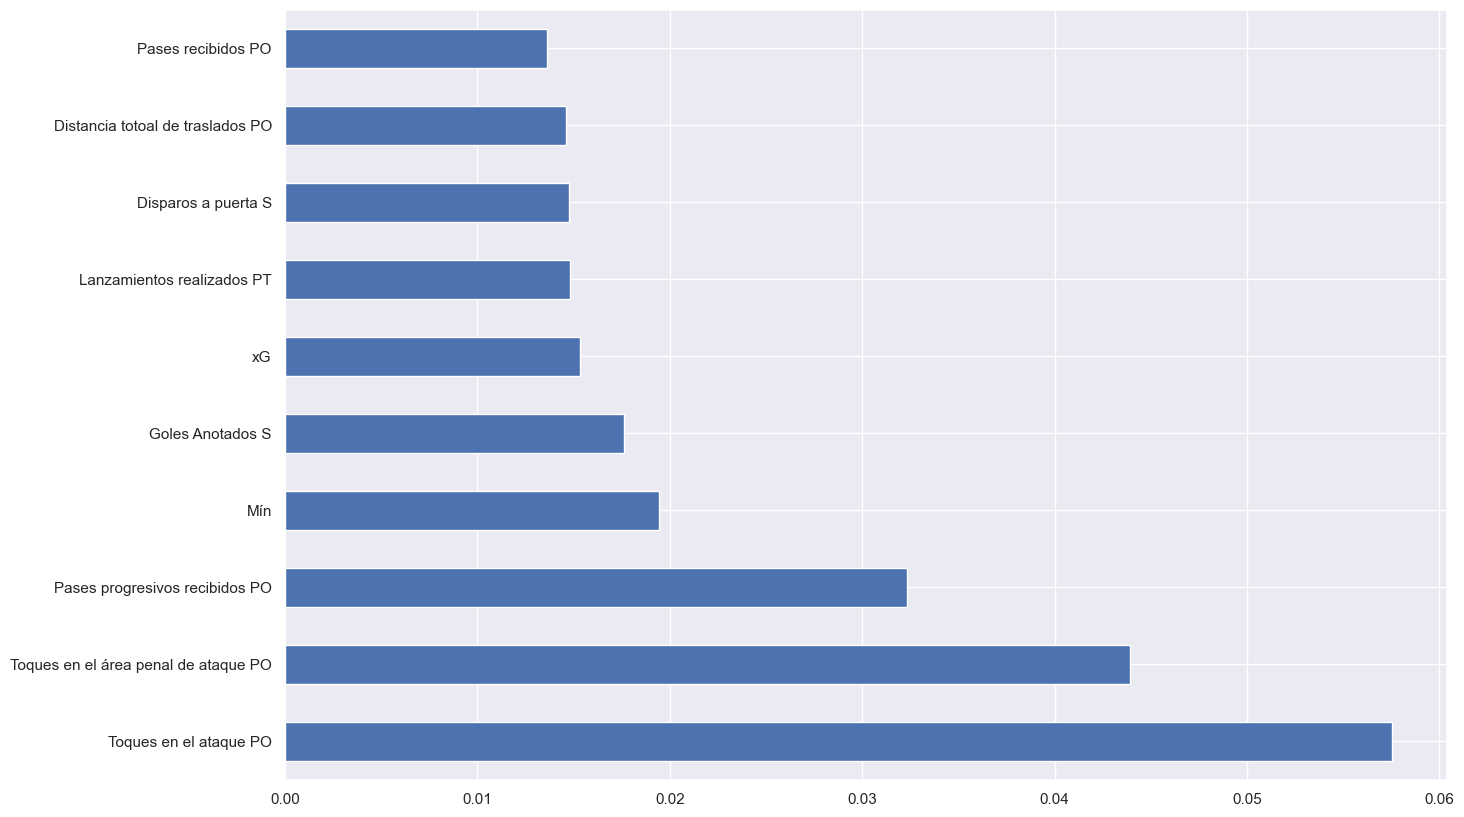

In [54]:
# print the features importance.

fig,ax = plt.subplots(figsize=(15,10))

feat_importances = pd.Series(model.feature_importances_, index=feature_names[:-1])

feat_importances.nlargest(10).plot(kind='barh')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a4052e7-2e71-4dc5-adb3-89f874561d93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Creación Modelo Jugadores de Campo Con los datos sumados por jugador

In [55]:
columnas=[]
for i in datos_totales_por_jugador_sin_gk.drop(['Fecha','Equipo','Posc','Edad','País','núm.','Nacionalidad','dia_semana','Histórico valor mercado máximo','Valor actual mercado'],axis=1).columns:
    if ("Porcentaje" in i) or ("%" in i):
        continue
    columnas.append(i)

In [56]:
# columnas

In [57]:
datos_totales_por_jugador_sumados= datos_totales_por_jugador_sin_gk[columnas].groupby(['Jugador']).sum().reset_index()
datos_totales_por_jugador_sumados

,Jugador,Mín,Goles Anotados S,Asistencias S,Tiros Penales Ejecutado Ss,Tiros Penales Intentados S,Total disparos S,Disparos a puerta S,Tarjetas Amarillas S,Tarjetas Rojas S,...,Posicion adelantada M,Pases cruzados M,Intercepciones M,Barridas ganadas M,Penal ejecutado M,Penal concedido M,Goles en contra M,Recuperación de pelotas M,Duelos Aéreos ganados M,Duelos Aéreos perdidos M
0,Aaron Cresswell,2165,0,1,0,0,9,1,3,0,...,1,130,27,11,0.0,0.0,0,119.0,27.0,27.0
1,Aaron Hickey,1847,0,1,0,0,11,2,7,0,...,1,26,17,26,0.0,1.0,0,107.0,13.0,22.0
2,Aaron Wan-Bissaka,1345,0,0,0,0,9,2,2,0,...,0,14,21,23,0.0,0.0,0,69.0,13.0,17.0
3,Abdul Mumin,742,0,0,0,0,4,1,2,0,...,0,2,8,8,0.0,0.0,0,47.0,13.0,14.0
4,Abner,517,0,0,0,0,4,1,2,0,...,0,10,8,9,0.0,1.0,0,38.0,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Youssef En-Nesyri,1584,8,0,0,0,57,23,4,0,...,18,4,4,8,0.0,0.0,0,26.0,59.0,85.0
595,Youssouf Sabaly,1545,1,1,0,0,12,3,2,0,...,0,16,18,21,0.0,0.0,0,101.0,5.0,11.0
596,Yunus Musah,2107,0,2,0,0,22,3,10,0,...,3,40,11,35,0.0,0.0,0,97.0,28.0,36.0
597,Yuri Berchiche,2136,1,1,0,0,24,6,8,1,...,5,62,39,29,1.0,0.0,0,156.0,48.0,25.0


In [58]:
datos_totales_por_jugador_sin_gk_unique=datos_totales_por_jugador_sin_gk.drop_duplicates(subset=['Jugador'])

In [59]:
datos_totales_por_jugador_sumados_mod =  datos_totales_por_jugador_sumados.merge(datos_totales_por_jugador_sin_gk_unique[['Jugador','Valor actual mercado']],how="left",on="Jugador")

In [60]:
datos_totales_por_jugador_sumados_mod

,Jugador,Mín,Goles Anotados S,Asistencias S,Tiros Penales Ejecutado Ss,Tiros Penales Intentados S,Total disparos S,Disparos a puerta S,Tarjetas Amarillas S,Tarjetas Rojas S,...,Pases cruzados M,Intercepciones M,Barridas ganadas M,Penal ejecutado M,Penal concedido M,Goles en contra M,Recuperación de pelotas M,Duelos Aéreos ganados M,Duelos Aéreos perdidos M,Valor actual mercado
0,Aaron Cresswell,2165,0,1,0,0,9,1,3,0,...,130,27,11,0.0,0.0,0,119.0,27.0,27.0,2500000.0
1,Aaron Hickey,1847,0,1,0,0,11,2,7,0,...,26,17,26,0.0,1.0,0,107.0,13.0,22.0,18000000.0
2,Aaron Wan-Bissaka,1345,0,0,0,0,9,2,2,0,...,14,21,23,0.0,0.0,0,69.0,13.0,17.0,22000000.0
3,Abdul Mumin,742,0,0,0,0,4,1,2,0,...,2,8,8,0.0,0.0,0,47.0,13.0,14.0,1500000.0
4,Abner,517,0,0,0,0,4,1,2,0,...,10,8,9,0.0,1.0,0,38.0,8.0,12.0,8000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Youssef En-Nesyri,1584,8,0,0,0,57,23,4,0,...,4,4,8,0.0,0.0,0,26.0,59.0,85.0,15000000.0
595,Youssouf Sabaly,1545,1,1,0,0,12,3,2,0,...,16,18,21,0.0,0.0,0,101.0,5.0,11.0,5000000.0
596,Yunus Musah,2107,0,2,0,0,22,3,10,0,...,40,11,35,0.0,0.0,0,97.0,28.0,36.0,22000000.0
597,Yuri Berchiche,2136,1,1,0,0,24,6,8,1,...,62,39,29,1.0,0.0,0,156.0,48.0,25.0,2000000.0


In [61]:
#Splitting the data

X = datos_totales_por_jugador_sumados_mod.drop(['Jugador','xAG_y'],axis=1)
y = datos_totales_por_jugador_sumados_mod['Valor actual mercado']

feature_names= X.columns

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1001)

## Estandarización

In [62]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['Valor actual mercado'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['Valor actual mercado'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['Valor actual mercado'],1))
X_test= np.array(X_test_estd.drop(['Valor actual mercado'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

## Prueba OLS

In [63]:
datos_prueba_ols =datos_totales_por_jugador_sumados_mod.copy()

In [64]:
for i in datos_prueba_ols.columns:
    datos_prueba_ols.rename(columns={i:i.replace(" ","_").replace("(","").replace(")","")},
               inplace=True)
    

In [65]:
string = ""
for i in datos_prueba_ols.drop(['Jugador','2a_amarilla_M','Valor_actual_mercado'],axis=1).columns:
    if ("Porcentaje" in i) or ("%" in i) or ("xAG_y" in i):
        continue
    string=string+ i +"+"
string= string[:-1]
string

'Mín+Goles_Anotados_S+Asistencias_S+Tiros_Penales_Ejecutado_Ss+Tiros_Penales_Intentados_S+Total_disparos_S+Disparos_a_puerta_S+Tarjetas_Amarillas_S+Tarjetas_Rojas_S+Toques_S+Barridas_S+Intercepciones_S+Bloqueos_S+xG+npxG+xAG_x+ACT+ACG+Pases_Completados_S+Pases_Intentados_S+Pases_Progresivos_S+Transportes+Acarreos_progresivos_S+Regates_intentados_S+Regates_exitosos_S+Pases_completados_P+Pases_intentados_P+Distancia_total_de_pase_P+Distancia_de_paso_progresiva_P+Pases_completados_Cortos_P+Pases_intentados_Cortos_P+Pases_completados_Medios_P+Pases_intentados_Medios_P+Pases_completados_Largos_P+Pases_intentados_Largos_P+Asistencias_P+xA+Pases_Clave+Pases_en_el_último_tercio_de_la_cancha_P+Pases_al_área_de_penalización_P+Cruce_en_el_área_de_penalización_P+Pases_progresivos_P+Pases_intentados_PT+Pases_de_balón_vivo_PT+Balón_muerto+Pases_de_tiros_libres_PT+Pases_Largos_PT+Pases_de_cambio_de_frente_PT+Pases_cruzados_PT+Lanzamientos_realizados_PT+Saques_de_esquina_PT+Saques_de_esquina_hacia_ade

In [66]:
lm = smf.ols(formula = 'Valor_actual_mercado ~ '+string, data=datos_prueba_ols).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Valor_actual_mercado   R-squared:                       0.617
Model:                              OLS   Adj. R-squared:                  0.555
Method:                   Least Squares   F-statistic:                     9.978
Date:                  Wed, 31 May 2023   Prob (F-statistic):           3.99e-66
Time:                          22:36:19   Log-Likelihood:                -10621.
No. Observations:                   599   AIC:                         2.141e+04
Df Residuals:                       515   BIC:                         2.178e+04
Df Model:                            83                                         
Covariance Type:              nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     6.022e+06   1.12e+06      5.397      0.000    3.83e+06    8.21e+06
Mín                                                          -1.008e+04   3711.981     -2.715      0.007   -1.74e+04   -2787.345
Goles_Anotados_S                                              1.731e+06   5.17e+05      3.346      0.001    7.15e+05    2.75e+06
Asistencias_S                                                -1.601e+05   3.64e+05     -0.440      0.660   -8.75e+05    5.55e+05
Tiros_Penales_Ejecutado_Ss                                    1.454e+06   2.78e+06      0.524      0.601      -4e+06    6.91e+06
Tiros_Penales_Intentados_S                                      4.3e+07   1.73e+07      2.486      0.013    9.01e+06     7.7e+07
Total_disparos_S                                              -3.28e+04   1.56e+05     -0.210      0.834    -3.4e+05    2.74e+05
Disparos_a_puerta_S                                           1.422e+04   3.04e+05      0.047      0.963   -5.84e+05    6.12e+05
Tarjetas_Amarillas_S                                          2.287e+05   1.82e+05      1.253      0.211    -1.3e+05    5.87e+05
Tarjetas_Rojas_S                                             -1.216e+06   7.18e+05     -1.693      0.091   -2.63e+06    1.95e+05
Toques_S                                                     -3.062e+06   3.66e+06     -0.836      0.404   -1.03e+07    4.13e+06
Barridas_S                                                    2.373e+05   1.73e+05      1.371      0.171   -1.03e+05    5.77e+05
Intercepciones_S                                              1.427e+05   1.23e+05      1.158      0.247   -9.93e+04    3.85e+05
Bloqueos_S                                                     8.21e+04   6.67e+04      1.231      0.219    -4.9e+04    2.13e+05
xG                                                            -4.48e+07   1.77e+07     -2.525      0.012   -7.97e+07   -9.95e+06
npxG                                                          4.618e+07   1.77e+07      2.609      0.009    1.14e+07     8.1e+07
xAG_x                                                         2.224e+06   1.39e+06      1.597      0.111   -5.11e+05    4.96e+06
ACT                                                          -2.429e+05   1.28e+05     -1.895      0.059   -4.95e+05    8897.368
ACG                                                           8.207e+05    4.4e+05      1.867      0.062    -4.3e+04    1.68e+06
Pases_Completados_S                                           1.624e+06   1.83e+06      0.888      0.375   -1.97e+06    5.22e+06
Pases_Intentados_S                                            1.275e+06   1.53e+06      0.833 

## Prueba varios modelos sin hperparametros

In [67]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

models,predictions =  LazyClassifier(random_state=1001).fit(X_train,X_test,y_train,y_test)

print(models)
print(predictions)

100%|██████████| 29/29 [00:06<00:00,  4.65it/s]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
ExtraTreeClassifier              0.05               0.05    None      0.05   
NearestCentroid                  0.04               0.05    None      0.04   
LogisticRegression               0.07               0.04    None      0.06   
LinearDiscriminantAnalysis       0.07               0.04    None      0.06   
RandomForestClassifier           0.06               0.04    None      0.04   
SGDClassifier                    0.07               0.03    None      0.06   
RidgeClassifier                  0.07               0.03    None      0.05   
LabelPropagation                 0.03               0.03    None      0.04   
LabelSpreading                   0.03               0.03    None      0.04   
LGBMClassifier                   0.05               0.03    None      0.05   
BernoulliNB                      0.03               0.03    None

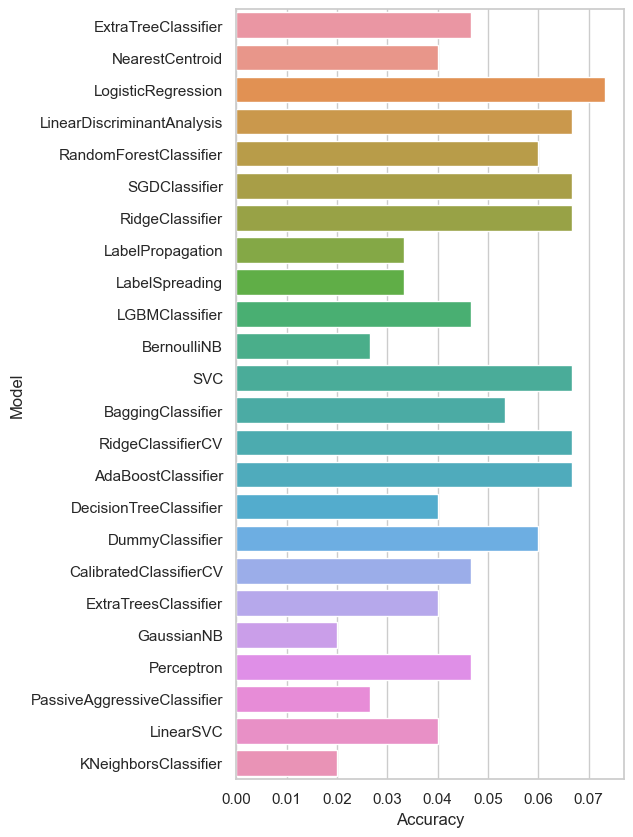

In [68]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

In [69]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

models,predictions =  LazyRegressor(random_state=1001).fit(X_train,X_test,y_train,y_test)

print(models)
print(predictions)

100%|██████████| 42/42 [00:05<00:00,  7.06it/s]

                                                              Adjusted R-Squared  \
Model                                                                              
ElasticNet                                                                 -1.06   
TweedieRegressor                                                           -1.13   
LassoLars                                                                  -1.14   
LassoLarsIC                                                                -1.14   
RandomForestRegressor                                                      -1.25   
ExtraTreesRegressor                                                        -1.29   
BaggingRegressor                                                           -1.30   
GradientBoostingRegressor                                                  -1.30   
LassoCV                                                                    -1.31   
XGBRegressor                                                               -

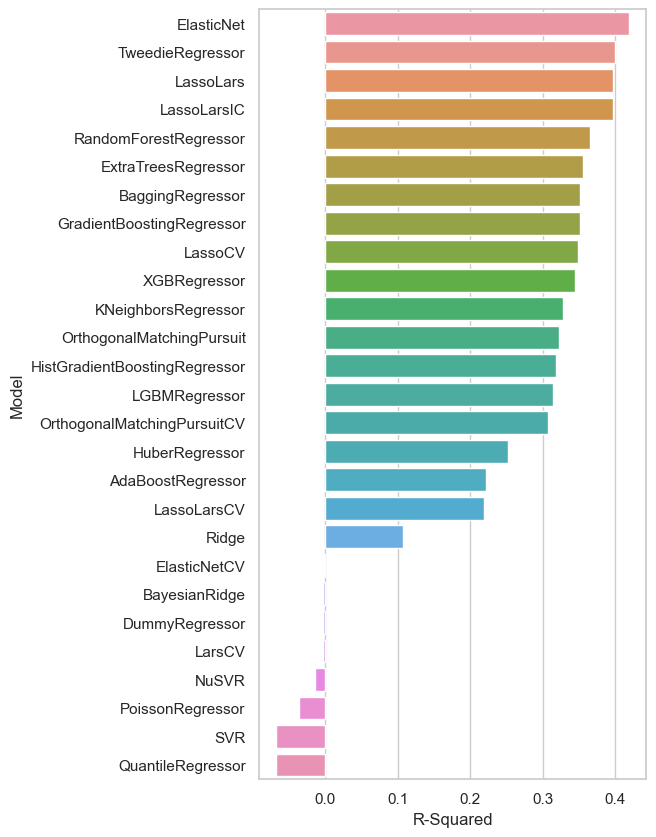

In [70]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index[:-15], x="R-Squared", data=predictions[:-15])

## Construcción modelo escogido

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

# model=DecisionTreeClassifier(random_state=1001)
model=ExtraTreesRegressor(n_estimators=100, random_state=1001)

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1001)

In [72]:
model.score(X_test,y_test)

0.3549670083621336

In [73]:
# name='Extra Tree Regressor'
# kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
# cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)

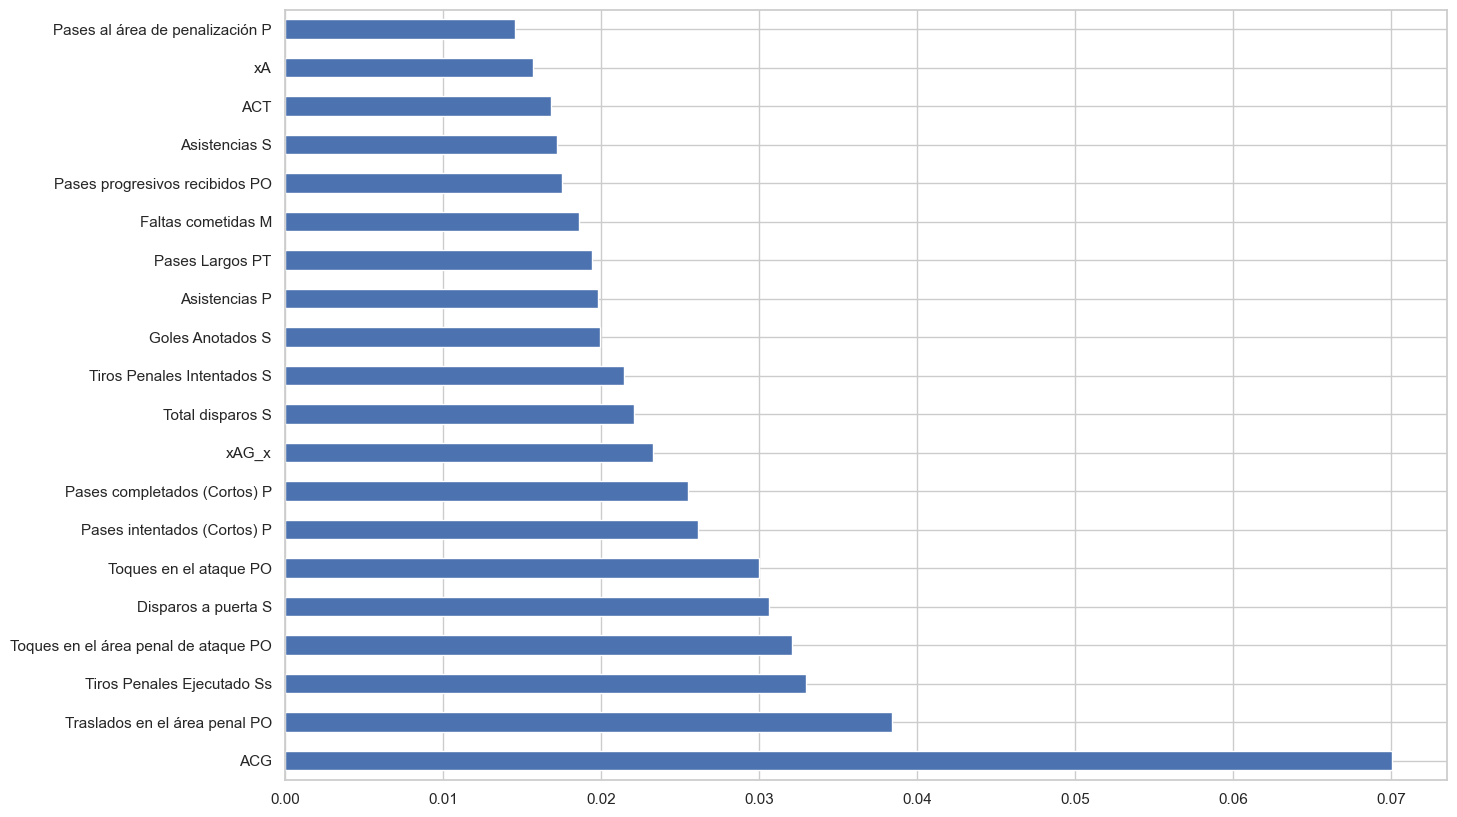

In [74]:
# print the features importance.

fig,ax = plt.subplots(figsize=(15,10))

feat_importances = pd.Series(model.feature_importances_, index=feature_names[:-1])

feat_importances.nlargest(20).plot(kind='barh')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a4052e7-2e71-4dc5-adb3-89f874561d93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Creación Modelo con el mejor resultado y mejores estadisticas

## Prueba OLS

In [75]:
datos_prueba_ols_final =datos_totales_por_jugador_sumados_mod.copy()

In [76]:
for i in datos_prueba_ols_final.columns:
    datos_prueba_ols_final.rename(columns={i:i.replace(" ","_").replace("(","").replace(")","")},
               inplace=True)
    

In [77]:
string = ""
for i in datos_prueba_ols_final.drop(['Jugador','2a_amarilla_M','Valor_actual_mercado'],axis=1).columns:
    if ("Porcentaje" in i) or ("%" in i) or ("xAG_y" in i):
        continue
    string=string+ i +"+"
string= string[:-1]
string

'Mín+Goles_Anotados_S+Asistencias_S+Tiros_Penales_Ejecutado_Ss+Tiros_Penales_Intentados_S+Total_disparos_S+Disparos_a_puerta_S+Tarjetas_Amarillas_S+Tarjetas_Rojas_S+Toques_S+Barridas_S+Intercepciones_S+Bloqueos_S+xG+npxG+xAG_x+ACT+ACG+Pases_Completados_S+Pases_Intentados_S+Pases_Progresivos_S+Transportes+Acarreos_progresivos_S+Regates_intentados_S+Regates_exitosos_S+Pases_completados_P+Pases_intentados_P+Distancia_total_de_pase_P+Distancia_de_paso_progresiva_P+Pases_completados_Cortos_P+Pases_intentados_Cortos_P+Pases_completados_Medios_P+Pases_intentados_Medios_P+Pases_completados_Largos_P+Pases_intentados_Largos_P+Asistencias_P+xA+Pases_Clave+Pases_en_el_último_tercio_de_la_cancha_P+Pases_al_área_de_penalización_P+Cruce_en_el_área_de_penalización_P+Pases_progresivos_P+Pases_intentados_PT+Pases_de_balón_vivo_PT+Balón_muerto+Pases_de_tiros_libres_PT+Pases_Largos_PT+Pases_de_cambio_de_frente_PT+Pases_cruzados_PT+Lanzamientos_realizados_PT+Saques_de_esquina_PT+Saques_de_esquina_hacia_ade

In [78]:
lm_final = smf.ols(formula = 'Valor_actual_mercado ~ '+"Mín+Goles_Anotados_S+Tiros_Penales_Intentados_S++xG+npxG+ACG+Regates_intentados_S+Distancia_de_paso_progresiva_P+Cruce_en_el_área_de_penalización_P+Pases_progresivos_P+Pases_Largos_PT+Saques_de_esquina_hacia_adentro_PT+Pases_intentados_Cortos_P+Pases_intentados_Medios_P+Pases_intentados_Largos_P+Intercepciones_D+Barridas_en_la_defensa_D+Robos_intentados_PO+Distancia_de_traslado_progresivo_PO+Robos_intentados_PO+Penal_ejecutado_M+Posicion_adelantada_M", data=datos_prueba_ols_final).fit()
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Valor_actual_mercado   R-squared:                       0.541
Model:                              OLS   Adj. R-squared:                  0.524
Method:                   Least Squares   F-statistic:                     32.39
Date:                  Wed, 31 May 2023   Prob (F-statistic):           2.00e-83
Time:                          22:36:33   Log-Likelihood:                -10675.
No. Observations:                   599   AIC:                         2.139e+04
Df Residuals:                       577   BIC:                         2.149e+04
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             5.88e+06   9.96e+05      5.902      0.000    3.92e+06    7.84e+06
Mín                                 -1.535e+04   1832.761     -8.376      0.000    -1.9e+04   -1.18e+04
Goles_Anotados_S                     1.423e+06   4.32e+05      3.296      0.001    5.75e+05    2.27e+06
Tiros_Penales_Intentados_S           3.867e+07   1.27e+07      3.054      0.002    1.38e+07    6.35e+07
xG                                  -4.773e+07   1.59e+07     -3.008      0.003   -7.89e+07   -1.66e+07
npxG                                 4.946e+07   1.59e+07      3.116      0.002    1.83e+07    8.06e+07
ACG                                  8.932e+05   2.66e+05      3.362      0.001    3.71e+05    1.42e+06
Regates_intentados_S                 3.489e+06   2.32e+06      1.507      0.132   -1.06e+06    8.04e+06
Distancia_de_paso_progresiva_P      -4017.2123   1018.088     -3.946      0.000   -6016.822   -2017.603
Cruce_en_el_área_de_penalización_P  -4.899e+05   1.77e+05     -2.761      0.006   -8.38e+05   -1.41e+05
Pases_progresivos_P                 -1.483e+05   2.93e+04     -5.053      0.000   -2.06e+05   -9.07e+04
Pases_Largos_PT                      9.205e+05   2.27e+05      4.057      0.000    4.75e+05    1.37e+06
Saques_de_esquina_hacia_adentro_PT  -1.823e+05   7.79e+04     -2.341      0.020   -3.35e+05   -2.94e+04
Pases_intentados_Cortos_P            5.522e+04   8769.504      6.297      0.000     3.8e+04    7.24e+04
Pases_intentados_Medios_P            4.188e+04   1.31e+04      3.198      0.001    1.62e+04    6.76e+04
Pases_intentados_Largos_P            6.112e+04   2.37e+04      2.579      0.010    1.46e+04    1.08e+05
Intercepciones_D                     1.902e+05   9.71e+04      1.959      0.051    -497.826    3.81e+05
Barridas_en_la_defensa_D              1.52e+05   8.63e+04      1.762      0.079   -1.74e+04    3.21e+05
Robos_intentados_PO                 -3.427e+06   2.31e+06     -1.481      0.139   -7.97e+06    1.12e+06
Distancia_de_traslado_progresivo_PO  3945.2118   1479.451      2.667      0.008    1039.447    6850.977
Penal_ejecutado_M                    3.606e+06   1.39e+06      2.600      0.010    8.82e+05    6.33e+06
Posicion_adelantada_M               -5.156e+05    1.8e+05     -2.863      0.004   -8.69e+05   -1.62e+05
==============================================================================
Omnibus:                      132.909   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.882
Skew:                           1.013   Prob(JB):                     1.02e-99
Kurtosis:                       6.763   Cond. No.                     2.91e+05
==================================================================

In [79]:
# "Mín","Goles_Anotados_S","Tiros_Penales_Intentados_S","xG","npxG","ACG","Regates_intentados_S","Distancia_de_paso_progresiva_P","Pases_en_el_último_tercio_de_la_cancha_P","Cruce_en_el_área_de_penalización_P","Pases_progresivos_P","Pases_Largos_PT","Saques_de_esquina_hacia_adentro_PT","Pases_intentados_Cortos_P","Pases_intentados_Medios_P","Pases_intentados_Largos_P","Intercepciones_D"

In [80]:
#Splitting the data

X = datos_totales_por_jugador_sumados_mod[["Mín","Goles Anotados S","Tiros Penales Intentados S","xG","npxG","ACG","Regates intentados S","Distancia de paso progresiva P","Pases en el último tercio de la cancha P","Cruce en el área de penalización P","Pases progresivos P","Pases Largos PT","Saques de esquina hacia adentro PT","Pases intentados (Cortos) P","Pases intentados (Medios) P","Pases intentados (Largos) P","Intercepciones D"]]
y = datos_totales_por_jugador_sumados_mod['Valor actual mercado']

feature_names= X.columns

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1001)

## Estandarización

In [81]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['Valor actual mercado'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['Valor actual mercado'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['Valor actual mercado'],1))
X_test= np.array(X_test_estd.drop(['Valor actual mercado'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

## Prueba varios modelos sin hperparametros

In [82]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

models,predictions =  LazyClassifier(random_state=1001).fit(X_train,X_test,y_train,y_test)

print(models)
print(predictions)

100%|██████████| 29/29 [00:02<00:00, 11.03it/s]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
NearestCentroid                  0.02               0.06    None      0.01   
LinearSVC                        0.06               0.06    None      0.04   
LinearDiscriminantAnalysis       0.07               0.06    None      0.05   
RidgeClassifier                  0.08               0.05    None      0.04   
RidgeClassifierCV                0.07               0.04    None      0.03   
SVC                              0.08               0.04    None      0.03   
Perceptron                       0.07               0.04    None      0.05   
GaussianNB                       0.01               0.03    None      0.00   
LogisticRegression               0.07               0.03    None      0.04   
LGBMClassifier                   0.05               0.03    None      0.04   
DecisionTreeClassifier           0.04               0.03    None

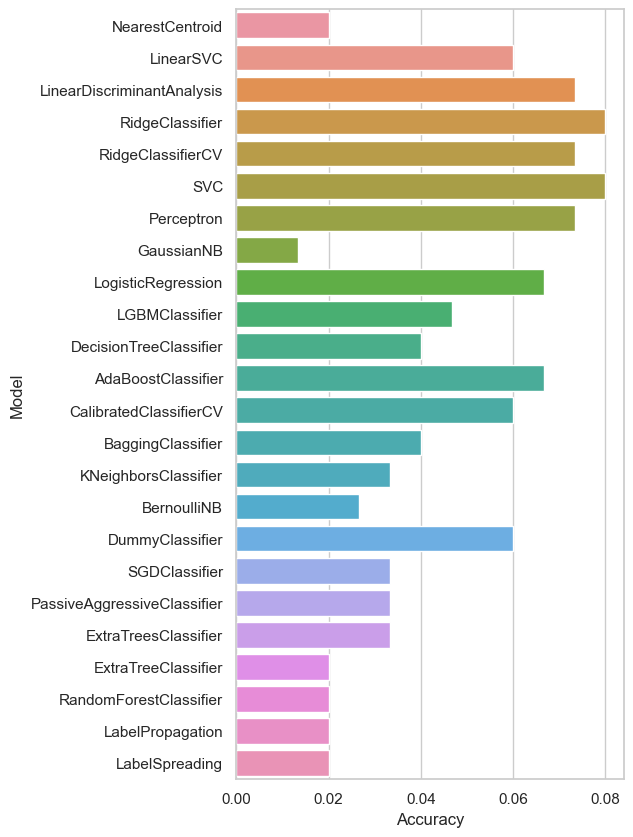

In [83]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

In [84]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

models,predictions =  LazyRegressor(random_state=1001).fit(X_train,X_test,y_train,y_test)

print(models)
print(predictions)

100%|██████████| 42/42 [00:02<00:00, 19.02it/s]

                               Adjusted R-Squared  R-Squared          RMSE  \
Model                                                                        
ExtraTreesRegressor                          0.28       0.37   14248752.15   
ElasticNet                                   0.27       0.35   14377683.65   
SGDRegressor                                 0.26       0.35   14460327.77   
KNeighborsRegressor                          0.25       0.33   14605784.15   
RandomForestRegressor                        0.24       0.33   14641095.75   
TweedieRegressor                             0.23       0.31   14813714.58   
XGBRegressor                                 0.22       0.31   14853973.51   
Ridge                                        0.22       0.31   14915551.03   
HistGradientBoostingRegressor                0.22       0.31   14919629.87   
TransformedTargetRegressor                   0.21       0.30   14947885.14   
LinearRegression                             0.21       0.30   1

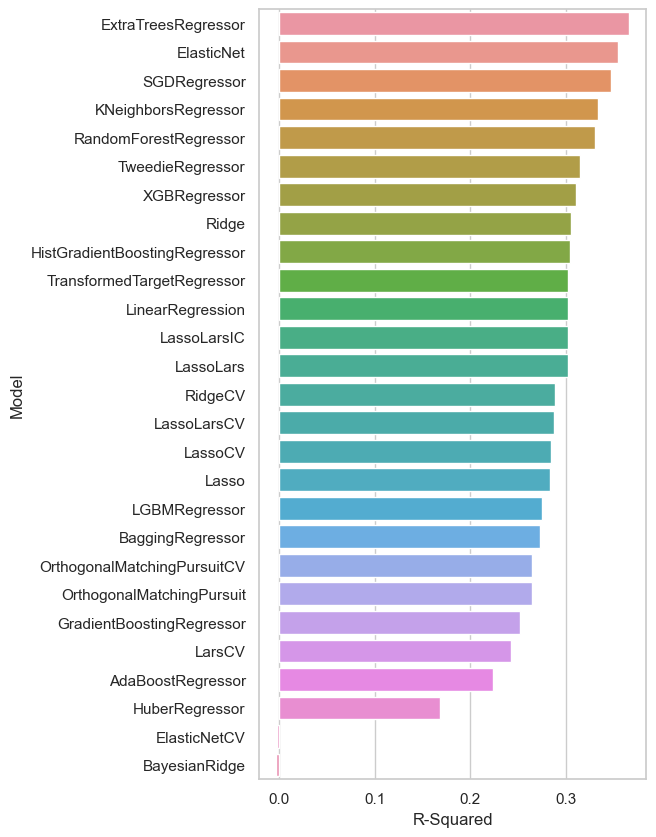

In [85]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index[:-15], x="R-Squared", data=predictions[:-15])

## Construcción modelo escogido

In [86]:
from sklearn.ensemble import ExtraTreesRegressor

# model=DecisionTreeClassifier(random_state=1001)
model=ExtraTreesRegressor(n_estimators=100, random_state=1001)

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1001)

In [87]:
model.score(X_test,y_test)

0.36619894788666363

In [88]:
# name='Extra Tree Regressor'
# kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
# cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)

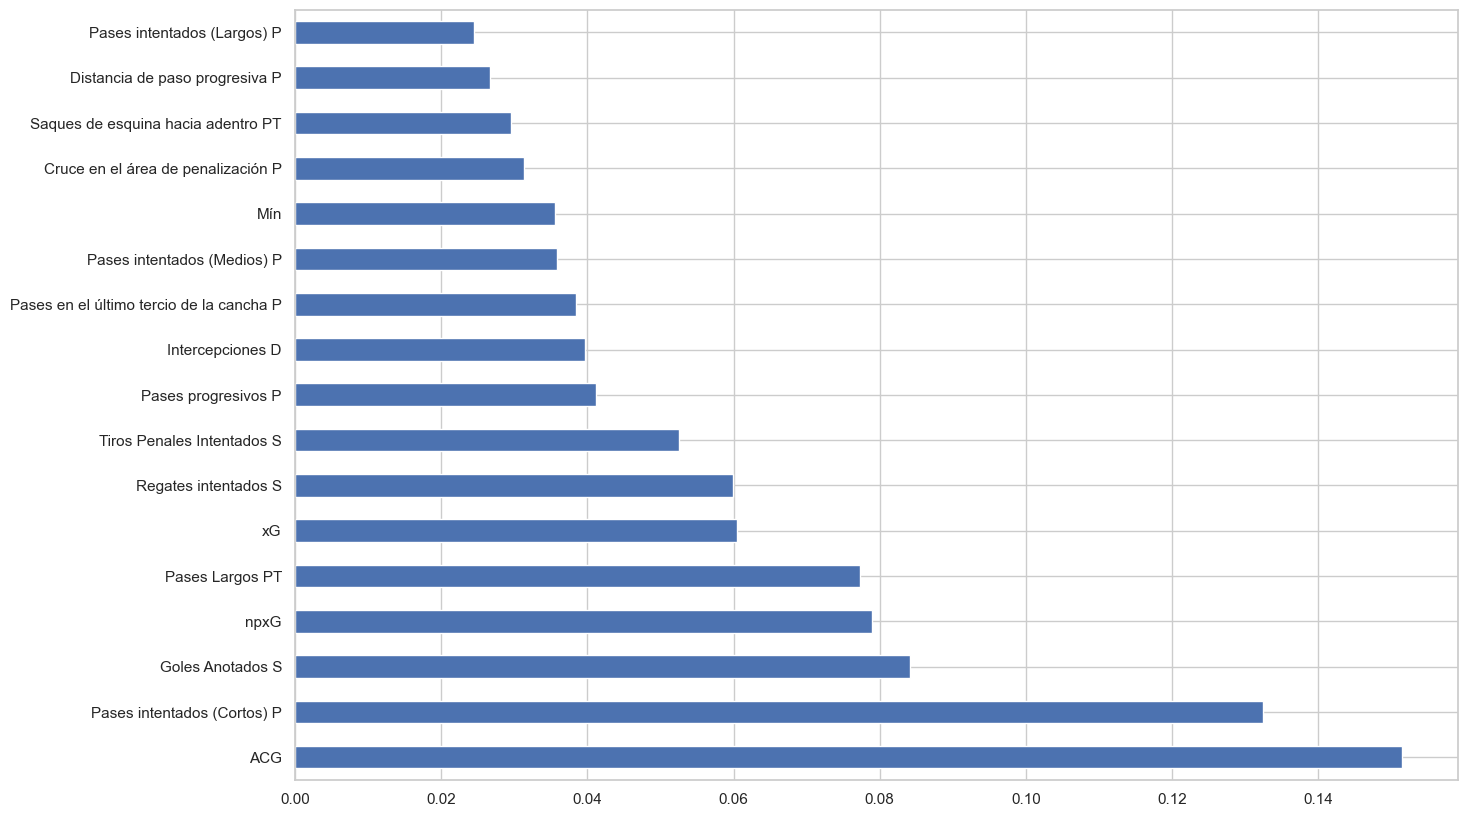

In [89]:
# print the features importance.

fig,ax = plt.subplots(figsize=(15,10))

feat_importances = pd.Series(model.feature_importances_, index=feature_names)

feat_importances.nlargest(20).plot(kind='barh')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a4052e7-2e71-4dc5-adb3-89f874561d93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Creación de un OLS separado por arqueros, defensas, medios y delanterosarqueros

In [90]:
#Arqueros
datos_arqueros_por_jugador_sumados= arqueros[columnas].groupby(['Jugador']).sum().reset_index()

datos_arqueros_por_jugador_sumados_unique=arqueros.drop_duplicates(subset=['Jugador'])

datos_arqueros_por_jugador_sumados_mod =  datos_arqueros_por_jugador_sumados.merge(datos_arqueros_por_jugador_sumados_unique[['Jugador','Valor actual mercado']],how="left",on="Jugador")

#Defensas
datos_defensas_por_jugador_sumados= defensas[columnas].groupby(['Jugador']).sum().reset_index()

datos_defensas_por_jugador_sumados_unique=defensas.drop_duplicates(subset=['Jugador'])

datos_defensas_por_jugador_sumados_mod =  datos_defensas_por_jugador_sumados.merge(datos_defensas_por_jugador_sumados_unique[['Jugador','Valor actual mercado']],how="left",on="Jugador")

#Arqueros
datos_medios_por_jugador_sumados= medios[columnas].groupby(['Jugador']).sum().reset_index()

datos_medios_por_jugador_sumados_unique=medios.drop_duplicates(subset=['Jugador'])

datos_medios_por_jugador_sumados_mod =  datos_medios_por_jugador_sumados.merge(datos_medios_por_jugador_sumados_unique[['Jugador','Valor actual mercado']],how="left",on="Jugador")

#Arqueros
datos_delanteros_por_jugador_sumados= delanteros[columnas].groupby(['Jugador']).sum().reset_index()

datos_delanteros_por_jugador_sumados_unique=delanteros.drop_duplicates(subset=['Jugador'])

datos_delanteros_por_jugador_sumados_mod =  datos_delanteros_por_jugador_sumados.merge(datos_delanteros_por_jugador_sumados_unique[['Jugador','Valor actual mercado']],how="left",on="Jugador")

# datos_arqueros_por_jugador_sumados_mod

## Prueba OLS

In [91]:
datos_prueba_ols =datos_delanteros_por_jugador_sumados_mod.copy()

In [92]:
for i in datos_prueba_ols.columns:
    datos_prueba_ols.rename(columns={i:i.replace(" ","_").replace("(","").replace(")","")},
               inplace=True)
    

In [93]:
string = ""
for i in datos_prueba_ols.drop(['Jugador','2a_amarilla_M','Valor_actual_mercado'],axis=1).columns:
    if ("Porcentaje" in i) or ("%" in i) or ("xAG_y" in i):
        continue
    string=string+ i +"+"
string= string[:-1]
string

'Mín+Goles_Anotados_S+Asistencias_S+Tiros_Penales_Ejecutado_Ss+Tiros_Penales_Intentados_S+Total_disparos_S+Disparos_a_puerta_S+Tarjetas_Amarillas_S+Tarjetas_Rojas_S+Toques_S+Barridas_S+Intercepciones_S+Bloqueos_S+xG+npxG+xAG_x+ACT+ACG+Pases_Completados_S+Pases_Intentados_S+Pases_Progresivos_S+Transportes+Acarreos_progresivos_S+Regates_intentados_S+Regates_exitosos_S+Pases_completados_P+Pases_intentados_P+Distancia_total_de_pase_P+Distancia_de_paso_progresiva_P+Pases_completados_Cortos_P+Pases_intentados_Cortos_P+Pases_completados_Medios_P+Pases_intentados_Medios_P+Pases_completados_Largos_P+Pases_intentados_Largos_P+Asistencias_P+xA+Pases_Clave+Pases_en_el_último_tercio_de_la_cancha_P+Pases_al_área_de_penalización_P+Cruce_en_el_área_de_penalización_P+Pases_progresivos_P+Pases_intentados_PT+Pases_de_balón_vivo_PT+Balón_muerto+Pases_de_tiros_libres_PT+Pases_Largos_PT+Pases_de_cambio_de_frente_PT+Pases_cruzados_PT+Lanzamientos_realizados_PT+Saques_de_esquina_PT+Saques_de_esquina_hacia_ade

In [94]:
lm = smf.ols(formula = 'Valor_actual_mercado ~ '+string, data=datos_prueba_ols).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Valor_actual_mercado   R-squared:                       0.624
Model:                              OLS   Adj. R-squared:                  0.503
Method:                   Least Squares   F-statistic:                     5.140
Date:                  Wed, 31 May 2023   Prob (F-statistic):           2.98e-24
Time:                          22:36:39   Log-Likelihood:                -6084.8
No. Observations:                   341   AIC:                         1.234e+04
Df Residuals:                       257   BIC:                         1.266e+04
Df Model:                            83                                         
Covariance Type:              nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     1.035e+07   1.36e+06      7.613      0.000    7.67e+06     1.3e+07
Mín                                                           3413.3600   1.17e+04      0.293      0.770   -1.96e+04    2.64e+04
Goles_Anotados_S                                              2.361e+06   1.12e+06      2.107      0.036    1.54e+05    4.57e+06
Asistencias_S                                                 3.483e+05   8.98e+05      0.388      0.698   -1.42e+06    2.12e+06
Tiros_Penales_Ejecutado_Ss                                    5.818e+06   4.77e+06      1.221      0.223   -3.57e+06    1.52e+07
Tiros_Penales_Intentados_S                                    1.978e+08   3.81e+07      5.190      0.000    1.23e+08    2.73e+08
Total_disparos_S                                             -1.566e+05    3.8e+05     -0.413      0.680   -9.04e+05    5.91e+05
Disparos_a_puerta_S                                          -5.046e+05   6.93e+05     -0.728      0.467   -1.87e+06     8.6e+05
Tarjetas_Amarillas_S                                          1.087e+06   7.47e+05      1.455      0.147   -3.85e+05    2.56e+06
Tarjetas_Rojas_S                                             -3.459e+06   2.76e+06     -1.253      0.211   -8.89e+06    1.98e+06
Toques_S                                                     -5.763e+06   4.72e+06     -1.221      0.223   -1.51e+07    3.53e+06
Barridas_S                                                    5.771e+06   2.93e+06      1.969      0.050   -1194.698    1.15e+07
Intercepciones_S                                              1.771e+06   9.85e+05      1.798      0.073   -1.69e+05    3.71e+06
Bloqueos_S                                                    3.472e+05   3.05e+05      1.138      0.256   -2.54e+05    9.48e+05
xG                                                           -2.138e+08   4.54e+07     -4.705      0.000   -3.03e+08   -1.24e+08
npxG                                                          2.144e+08   4.56e+07      4.704      0.000    1.25e+08    3.04e+08
xAG_x                                                         4.071e+06   3.03e+06      1.342      0.181    -1.9e+06       1e+07
ACT                                                           5.457e+04   3.41e+05      0.160      0.873   -6.17e+05    7.26e+05
ACG                                                          -5.792e+05    1.1e+06     -0.528      0.598   -2.74e+06    1.58e+06
Pases_Completados_S                                             4.5e+06   2.27e+06      1.984      0.048    3.32e+04    8.97e+06
Pases_Intentados_S                                            4.396e+06   2.34e+06      1.882 

In [95]:
# "Mín","Goles_Anotados_S","Tiros_Penales_Intentados_S","xG","npxG","ACG","Regates_intentados_S","Distancia_de_paso_progresiva_P","Pases_en_el_último_tercio_de_la_cancha_P","Cruce_en_el_área_de_penalización_P","Pases_progresivos_P","Pases_Largos_PT","Saques_de_esquina_hacia_adentro_PT","Pases_intentados_Cortos_P","Pases_intentados_Medios_P","Pases_intentados_Largos_P","Intercepciones_D"

# Predicción

In [96]:
# "Mín","Goles_Anotados_S","Tiros_Penales_Intentados_S",,"xG","npxG","ACG","Regates_intentados_S","Distancia_de_paso_progresiva_P","Cruce_en_el_área_de_penalización_P","Pases_progresivos_P","Pases_Largos_PT","Saques_de_esquina_hacia_adentro_PT","Pases_intentados_Cortos_P","Pases_intentados_Medios_P","Pases_intentados_Largos_P","Intercepciones_D","Barridas_en_la_defensa_D","Robos_intentados_PO","Distancia_de_traslado_progresivo_PO","Robos_intentados_PO","Penal_ejecutado_M","Posicion_adelantada_M"

In [97]:
datos_prueba_ols_final["Robos_intentados_PO"]

0      7.00
1     44.00
2     34.00
3      9.00
4      9.00
       ... 
594   20.00
595   38.00
596   69.00
597   22.00
598    8.00
Name: Robos_intentados_PO, Length: 599, dtype: float64

In [98]:
pruebas_prediccion= datos_prueba_ols_final[["Mín","Goles_Anotados_S","Tiros_Penales_Intentados_S","xG","npxG","ACG","Regates_intentados_S","Distancia_de_paso_progresiva_P","Cruce_en_el_área_de_penalización_P","Pases_progresivos_P","Pases_Largos_PT","Saques_de_esquina_hacia_adentro_PT","Pases_intentados_Cortos_P","Pases_intentados_Medios_P","Pases_intentados_Largos_P","Intercepciones_D","Barridas_en_la_defensa_D","Robos_intentados_PO","Distancia_de_traslado_progresivo_PO","Robos_intentados_PO","Penal_ejecutado_M","Posicion_adelantada_M"]]
pruebas_prediccion_X = sm.add_constant(pruebas_prediccion)
pruebas_prediccion_y = datos_prueba_ols_final['Valor_actual_mercado']

In [99]:
olsmod = sm.OLS(pruebas_prediccion_y, pruebas_prediccion_X)
olsres = olsmod.fit()
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Valor_actual_mercado   R-squared:                       0.541
Model:                              OLS   Adj. R-squared:                  0.524
Method:                   Least Squares   F-statistic:                     32.39
Date:                  Wed, 31 May 2023   Prob (F-statistic):           2.00e-83
Time:                          22:36:39   Log-Likelihood:                -10675.
No. Observations:                   599   AIC:                         2.139e+04
Df Residuals:                       577   BIC:                         2.149e+04
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 5.88e+06   9.96e+05      5.902      0.000    3.92e+06    7.84e+06
Mín                                 -1.535e+04   1832.761     -8.376      0.000    -1.9e+04   -1.18e+04
Goles_Anotados_S                     1.423e+06   4.32e+05      3.296      0.001    5.75e+05    2.27e+06
Tiros_Penales_Intentados_S           3.867e+07   1.27e+07      3.054      0.002    1.38e+07    6.35e+07
xG                                  -4.773e+07   1.59e+07     -3.008      0.003   -7.89e+07   -1.66e+07
npxG                                 4.946e+07   1.59e+07      3.116      0.002    1.83e+07    8.06e+07
ACG                                  8.932e+05   2.66e+05      3.362      0.001    3.71e+05    1.42e+06
Regates_intentados_S                 3.489e+06   2.32e+06      1.507      0.132   -1.06e+06    8.04e+06
Distancia_de_paso_progresiva_P      -4017.2123   1018.088     -3.946      0.000   -6016.822   -2017.603
Cruce_en_el_área_de_penalización_P  -4.899e+05   1.77e+05     -2.761      0.006   -8.38e+05   -1.41e+05
Pases_progresivos_P                 -1.483e+05   2.93e+04     -5.053      0.000   -2.06e+05   -9.07e+04
Pases_Largos_PT                      9.205e+05   2.27e+05      4.057      0.000    4.75e+05    1.37e+06
Saques_de_esquina_hacia_adentro_PT  -1.823e+05   7.79e+04     -2.341      0.020   -3.35e+05   -2.94e+04
Pases_intentados_Cortos_P            5.522e+04   8769.504      6.297      0.000     3.8e+04    7.24e+04
Pases_intentados_Medios_P            4.188e+04   1.31e+04      3.198      0.001    1.62e+04    6.76e+04
Pases_intentados_Largos_P            6.112e+04   2.37e+04      2.579      0.010    1.46e+04    1.08e+05
Intercepciones_D                     1.902e+05   9.71e+04      1.959      0.051    -497.826    3.81e+05
Barridas_en_la_defensa_D              1.52e+05   8.63e+04      1.762      0.079   -1.74e+04    3.21e+05
Robos_intentados_PO                 -1.714e+06   1.16e+06     -1.481      0.139   -3.99e+06    5.59e+05
Distancia_de_traslado_progresivo_PO  3945.2118   1479.451      2.667      0.008    1039.447    6850.977
Robos_intentados_PO                 -1.714e+06   1.16e+06     -1.481      0.139   -3.99e+06    5.59e+05
Penal_ejecutado_M                    3.606e+06   1.39e+06      2.600      0.010    8.82e+05    6.33e+06
Posicion_adelantada_M               -5.156e+05    1.8e+05     -2.863      0.004   -8.69e+05   -1.62e+05
==============================================================================
Omnibus:                      132.909   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.882
Skew:                           1.013   Prob(JB):                     1.02e-99
Kurtosis:                       6.763   C

In [104]:
pruebas_prediccion_X

,const,Mín,Goles_Anotados_S,Tiros_Penales_Intentados_S,xG,npxG,ACG,Regates_intentados_S,Distancia_de_paso_progresiva_P,Cruce_en_el_área_de_penalización_P,...,Pases_intentados_Cortos_P,Pases_intentados_Medios_P,Pases_intentados_Largos_P,Intercepciones_D,Barridas_en_la_defensa_D,Robos_intentados_PO,Distancia_de_traslado_progresivo_PO,Robos_intentados_PO,Penal_ejecutado_M,Posicion_adelantada_M
0,1.00,2165,0,0,0.10,0.10,1.00,7.00,8318.00,15.00,...,646.00,474.00,201.00,27,12.00,7.00,1667.00,7.00,0.00,1
1,1.00,1847,0,0,0.20,0.20,2.00,44.00,3240.00,4.00,...,404.00,302.00,78.00,17,27.00,44.00,1764.00,44.00,0.00,1
2,1.00,1345,0,0,1.20,1.20,1.00,34.00,3043.00,2.00,...,450.00,224.00,41.00,21,19.00,34.00,1297.00,34.00,0.00,0
3,1.00,742,0,0,0.30,0.30,0.00,9.00,1728.00,1.00,...,76.00,179.00,84.00,8,4.00,9.00,610.00,9.00,0.00,0
4,1.00,517,0,0,1.70,1.70,1.00,9.00,1437.00,1.00,...,129.00,105.00,33.00,8,9.00,9.00,380.00,9.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1.00,1584,8,0,7.80,7.80,4.00,20.00,312.00,0.00,...,130.00,69.00,8.00,4,3.00,20.00,314.00,20.00,0.00,18
595,1.00,1545,1,0,0.40,0.40,2.00,38.00,4149.00,1.00,...,475.00,292.00,55.00,18,26.00,38.00,1615.00,38.00,0.00,0
596,1.00,2107,0,0,1.70,1.70,3.00,69.00,2277.00,4.00,...,348.00,296.00,64.00,11,17.00,69.00,2416.00,69.00,0.00,3
597,1.00,2136,1,0,0.90,0.90,2.00,22.00,7640.00,13.00,...,626.00,546.00,142.00,39,24.00,22.00,2134.00,22.00,1.00,5


In [102]:
ypred = olsres.predict(pruebas_prediccion_X)
print(ypred)

0     -6471181.33
1     10903742.42
2     19824551.20
3      6977921.01
4     11917565.23
          ...    
594   12842690.04
595   16456313.93
596    9490982.14
597    6723719.37
598   14434675.13
Length: 599, dtype: float64


In [103]:
# Guardar en un archivo .pkl el modelo olsres
import pickle
pickle.dump(olsres, open("olsres_precios.pkl", "wb"))

In [ ]:
datos_prueba_ols_final['Valor_Prediccion_2023_2024']= ypred

In [ ]:
# datos_prueba_ols_final['Diferencia_Precio'] = datos_prueba_ols_final['Valor_actual_mercado'] - datos_prueba_ols_final['Valor_Prediccion_2023_2024']

In [ ]:
datos_prueba_ols_final[['Jugador','Valor_actual_mercado','Valor_Prediccion_2023_2024']]

,Jugador,Valor_actual_mercado,Valor_Prediccion_2023_2024
0,Aaron Cresswell,2500000.00,-6471181.33
1,Aaron Hickey,18000000.00,10903742.42
2,Aaron Wan-Bissaka,22000000.00,19824551.20
3,Abdul Mumin,1500000.00,6977921.01
4,Abner,8000000.00,11917565.23
...,...,...,...
594,Youssef En-Nesyri,15000000.00,12842690.04
595,Youssouf Sabaly,5000000.00,16456313.93
596,Yunus Musah,22000000.00,9490982.14
597,Yuri Berchiche,2000000.00,6723719.37


In [ ]:
datos_prueba_ols_final

,Jugador,Mín,Goles_Anotados_S,Asistencias_S,Tiros_Penales_Ejecutado_Ss,Tiros_Penales_Intentados_S,Total_disparos_S,Disparos_a_puerta_S,Tarjetas_Amarillas_S,Tarjetas_Rojas_S,...,Intercepciones_M,Barridas_ganadas_M,Penal_ejecutado_M,Penal_concedido_M,Goles_en_contra_M,Recuperación_de_pelotas_M,Duelos_Aéreos_ganados_M,Duelos_Aéreos_perdidos_M,Valor_actual_mercado,Valor_Prediccion_2023_2024
0,Aaron Cresswell,2165,0,1,0,0,9,1,3,0,...,27,11,0.00,0.00,0,119.00,27.00,27.00,2500000.00,-6471181.33
1,Aaron Hickey,1847,0,1,0,0,11,2,7,0,...,17,26,0.00,1.00,0,107.00,13.00,22.00,18000000.00,10903742.42
2,Aaron Wan-Bissaka,1345,0,0,0,0,9,2,2,0,...,21,23,0.00,0.00,0,69.00,13.00,17.00,22000000.00,19824551.20
3,Abdul Mumin,742,0,0,0,0,4,1,2,0,...,8,8,0.00,0.00,0,47.00,13.00,14.00,1500000.00,6977921.01
4,Abner,517,0,0,0,0,4,1,2,0,...,8,9,0.00,1.00,0,38.00,8.00,12.00,8000000.00,11917565.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Youssef En-Nesyri,1584,8,0,0,0,57,23,4,0,...,4,8,0.00,0.00,0,26.00,59.00,85.00,15000000.00,12842690.04
595,Youssouf Sabaly,1545,1,1,0,0,12,3,2,0,...,18,21,0.00,0.00,0,101.00,5.00,11.00,5000000.00,16456313.93
596,Yunus Musah,2107,0,2,0,0,22,3,10,0,...,11,35,0.00,0.00,0,97.00,28.00,36.00,22000000.00,9490982.14
597,Yuri Berchiche,2136,1,1,0,0,24,6,8,1,...,39,29,1.00,0.00,0,156.00,48.00,25.00,2000000.00,6723719.37


In [107]:
datos_prueba_ols_final

,Jugador,Mín,Goles_Anotados_S,Asistencias_S,Tiros_Penales_Ejecutado_Ss,Tiros_Penales_Intentados_S,Total_disparos_S,Disparos_a_puerta_S,Tarjetas_Amarillas_S,Tarjetas_Rojas_S,...,Pases_cruzados_M,Intercepciones_M,Barridas_ganadas_M,Penal_ejecutado_M,Penal_concedido_M,Goles_en_contra_M,Recuperación_de_pelotas_M,Duelos_Aéreos_ganados_M,Duelos_Aéreos_perdidos_M,Valor_actual_mercado
0,Aaron Cresswell,2165,0,1,0,0,9,1,3,0,...,130,27,11,0.00,0.00,0,119.00,27.00,27.00,2500000.00
1,Aaron Hickey,1847,0,1,0,0,11,2,7,0,...,26,17,26,0.00,1.00,0,107.00,13.00,22.00,18000000.00
2,Aaron Wan-Bissaka,1345,0,0,0,0,9,2,2,0,...,14,21,23,0.00,0.00,0,69.00,13.00,17.00,22000000.00
3,Abdul Mumin,742,0,0,0,0,4,1,2,0,...,2,8,8,0.00,0.00,0,47.00,13.00,14.00,1500000.00
4,Abner,517,0,0,0,0,4,1,2,0,...,10,8,9,0.00,1.00,0,38.00,8.00,12.00,8000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Youssef En-Nesyri,1584,8,0,0,0,57,23,4,0,...,4,4,8,0.00,0.00,0,26.00,59.00,85.00,15000000.00
595,Youssouf Sabaly,1545,1,1,0,0,12,3,2,0,...,16,18,21,0.00,0.00,0,101.00,5.00,11.00,5000000.00
596,Yunus Musah,2107,0,2,0,0,22,3,10,0,...,40,11,35,0.00,0.00,0,97.00,28.00,36.00,22000000.00
597,Yuri Berchiche,2136,1,1,0,0,24,6,8,1,...,62,39,29,1.00,0.00,0,156.00,48.00,25.00,2000000.00


In [108]:
# Exportar a csv datos_prueba_ols_final solamente con las columnas que me interesan

datos_prueba_ols_final_export = datos_prueba_ols_final[["Jugador", "Mín","Goles_Anotados_S","Tiros_Penales_Intentados_S","xG","npxG","ACG","Regates_intentados_S","Distancia_de_paso_progresiva_P","Cruce_en_el_área_de_penalización_P","Pases_progresivos_P","Pases_Largos_PT","Saques_de_esquina_hacia_adentro_PT","Pases_intentados_Cortos_P","Pases_intentados_Medios_P","Pases_intentados_Largos_P","Intercepciones_D","Barridas_en_la_defensa_D","Robos_intentados_PO","Distancia_de_traslado_progresivo_PO","Robos_intentados_PO","Penal_ejecutado_M","Posicion_adelantada_M"]]
datos_prueba_ols_final_export.to_csv("datos_jugadores_ols_final.csv",index=False)

In [4]:
import pandas as pd
# Cargar dataframe  jugadores_laliga.csv
datos_jugadores_laliga = pd.read_csv("jugadores_laliga.csv", header=None)
# Cargar dataframe  jugadores_premier.csv
datos_jugadores_premier = pd.read_csv("jugadores_premier.csv", header=None)
# Cargar dataframe  datos_jugadores_ols_final
datos_jugadores_ols_final = pd.read_csv("datos_jugadores_ols_final.csv")

In [7]:
print(datos_jugadores_laliga.shape)
print(datos_jugadores_premier.shape)

(571, 1)
(543, 1)


In [8]:
# Elimino las filas que tengan valores que no estén presentes en la columna Jugador de datos_jugadores_ols_final
datos_jugadores_laliga = datos_jugadores_laliga[datos_jugadores_laliga[0].isin(datos_jugadores_ols_final['Jugador'])]
datos_jugadores_premier = datos_jugadores_premier[datos_jugadores_premier[0].isin(datos_jugadores_ols_final['Jugador'])]

In [10]:
print(datos_jugadores_laliga.shape)
print(datos_jugadores_premier.shape)

(229, 1)
(353, 1)


In [11]:
# Guardo los dataframes en archivos csv sin cabecera que sea 0
datos_jugadores_laliga.to_csv("jugadores_laliga.csv",index=False)
datos_jugadores_premier.to_csv("jugadores_premier.csv",index=False)

In [12]:
# Leo el excel proximos_partidos.xlsx
import pandas as pd
datos_proximos_partidos = pd.read_excel("proximos_partidos.xlsx")
# Creo un nuevo dataframe que contenga en cada fila la unión de las columnas datos_proximos_partidos["HomeTeam"] + "VS" + datos_proximos_partidos["AwayTeam"]
datos_next_game = pd.DataFrame()
datos_next_game["Partido"] = datos_proximos_partidos["HomeTeam"] + " VS " + datos_proximos_partidos["AwayTeam"]

In [14]:
# Guardo en un .csv el dataframe datos_next_game
datos_next_game.to_csv("datos_next_games.csv",index=False)

In [16]:
# Leo el excel proximos_partidoLaliga.xlsx
import pandas as pd
datos_proximos_partidos_laliga = pd.read_excel("proximos_partidoLaliga.xlsx")
# Creo un nuevo dataframe que contenga en cada fila la unión de las columnas datos_proximos_partidos["HomeTeam"] + "VS" + datos_proximos_partidos["AwayTeam"]
datos_next_game_laliga = pd.DataFrame()
datos_next_game_laliga["Partido"] = datos_proximos_partidos_laliga["HomeTeam"] + " VS " + datos_proximos_partidos_laliga["AwayTeam"]

# Guardo en un .csv el dataframe datos_next_game
datos_next_game_laliga.to_csv("datos_next_games_laliga.csv",index=False)

In [ ]:
# Generar .pkl del modelo
import pickle
pickle.dump(model, open("model_laliga.pkl", "wb"))
# Generar .pkl del scaler del modelo 
pickle.dump(scaler, open("scaler_laliga.pkl", "wb"))

In [25]:
# Hay valores nulos en datos_promedio_5partidos_proximos_laliga ?
pd.read_excel("datos_promedio_5partidos_proximos_laliga.xlsx").isnull().sum()

# Cambiar datos nulos por 0


Unnamed: 0          0
Date                0
HomeTeam            0
AwayTeam            0
year                0
                   ..
Prom5_HPelotazos    0
Prom5_APelotazos    0
Prom5_HxG           0
Prom5_AxG           0
TG                  0
Length: 63, dtype: int64

In [20]:
# Hay datos nulos en datos_promedio_5partidos_proximos_premier?
pd.read_excel("datos_promedio_5partidos_proximos_premier.xlsx").isnull().sum()


Unnamed: 0                0
Date                      0
HomeTeam                  0
AwayTeam                  0
year                      0
                         ..
proba_gol_2               0
proba_gol_3               0
proba_gol_4               0
proba_gol_5               0
Prediccion_gol_apuesta    0
Length: 70, dtype: int64

In [23]:
import numpy as np
lista = np.asarray([0,0,0, np.nan])
lista.mean()

nan